# PROBLEM PRZYDZIAŁU

# <span style="color:blue"> Przyklad 20 STR. 130

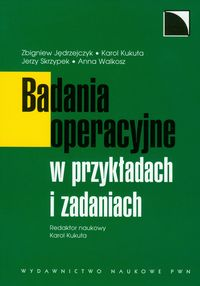

In [15]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["MASZYNY:  ", "detal_A","detal_B","detal_C","detal_D","detal_E", "Max czas na m", "koszt 1h"]
table.append_row(["Maszy 1",  0.800,    1.000,   0.400,  2.000, 0.625 ,"<=180 h",30 ])
table.append_row(["Maszy 2",  0.750,   0.600,   0.500,  1.875, 0.600,"<=180 h",42  ])
table.append_row(["Maszy 3",  1.250,   1.200,   0.375,  1.500, 0.500,"<=180 h",36 ])
table.append_row(["ilość:",  ">=90",    ">=90",   ">=90",  ">=75", ">=75","","" ])
print("Należy rozdzielić miesięczną produkcję tak, aby wyprodukować co najmniej 90 sztuk detali A, B, C oraz 75  detali D i E" )
print(table)

Należy rozdzielić miesięczną produkcję tak, aby wyprodukować co najmniej 90 sztuk detali A, B, C oraz 75  detali D i E
+-----------+--------+--------+---------+-------+-------+-------------+--------+
| MASZYNY:  | detal_ | detal_ | detal_C | detal | detal | Max czas na | koszt  |
|           |   A    |   B    |         |  _D   |  _E   |      m      |   1h   |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
|  Maszy 1  |  0.8   |  1.0   |   0.4   |  2.0  | 0.625 |   <=180 h   |   30   |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
|  Maszy 2  |  0.75  |  0.6   |   0.5   | 1.875 |  0.6  |   <=180 h   |   42   |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
|  Maszy 3  |  1.25  |  1.2   |  0.375  |  1.5  |  0.5  |   <=180 h   |   36   |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
|  ilość:   |  >=90  |  >=90  |  >=90   | >=75  | >=75  |             |


<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

to jest czas tzn. ilość godzin pracy i-tych maszyn robiących j-te detale

<span style="font-size: 130%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

wydajność maszyn w sztukach na godzinę

<span style="font-size: 130%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


Przez jedną godzinę maszyna S1 robi 0.80 sztuki
Pierwsze ograniczenie to czas, który ma nie przekraczać 180 godzin. Jeżeli x to czas to wtedy czasy każdej maszyny nie może przkeroczyć 180 godzin:

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & \leqslant 180 & (max-czas-maszyny-1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{25}} & \leqslant 180 & (max-czas-maszyny-2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}} & \leqslant 180 & (max-czas-maszyny-3)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy tetal trzeba wykonać w min określonej ilości</span>
Ilość detali zależy od zmiennej decyzyjnej xij oraz wspolczynnika (szt/h)
#### $
\left\{
\begin{align} 
{0.8x_{11}+0.75x_{21}+1.25x_{31}} & \geqslant 90 & (min-wiel-produkcji-produkt 1)\\
{1.0x_{12}+0.6x_{22}+1.2x_{32}} & \geqslant 90 & (min-wiel-produkcji-produkt 2)\\
{0.4x_{13}+0.5x_{23}+0.375x_{33}} & \geqslant 90 & (min-wiel-produkcji-produkt 3)\\
{2.0x_{14}+1.875x_{24}+1.5x_{34}} & \geqslant 75 & (min-wiel-produkcji-produkt 4)\\
{0.625x_{15}+0.6x_{25}+0.5x_{35}} & \geqslant 75 & (min-wiel-produkcji-produkt 5)\\
\end{align}
\right. 
$


<span style="font-size: 130%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Minimalizacja kosztów dzierżawy maszyn.

Zmiennymi decyzyjnymi jest ilość czasu poświęcona na produkcję xij.
Każda maszyna mainny koszt produkcji: 30 zł/h, 42 zł/h, 36 zł/h
maszyna 1 ma sumę czasów:

$
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}}
$

Suma kosztów dzierżawy to iloczyn ilości godzin i kosztu za godzinę dzierżawy.
Dla maszyny 1 bęzie to 30 zł/h.

$
30({x_{11}+x_{12}+x_{13}+x_{14}+x_{15}})
$


$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\
=30(x_{11}+x_{12}+x_{13}+ x_{14}+x_{15})\\
+42(x_{21}+x_{23}+x_{24}+ x_{24}+x_{25})\\
+36(x_{31}+x_{32}+x_{33}+ x_{34}+x_{35})\\
\to  min
\qquad 
} $

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [3]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("przykład 20 str.130",LpMinimize)

/home/wojciech/anaconda3/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [4]:
x11=LpVariable("x11",0)
x12=LpVariable("x12",0)
x13=LpVariable("x13",0)
x14=LpVariable("x14",0)
x15=LpVariable("x15",0)
x21=LpVariable("x21",0)
x22=LpVariable("x22",0)
x23=LpVariable("x23",0)
x24=LpVariable("x24",0)
x25=LpVariable("x25",0)
x31=LpVariable("x31",0)
x32=LpVariable("x32",0)
x33=LpVariable("x33",0)
x34=LpVariable("x34",0)
x35=LpVariable("x35",0)        

### Dodajemy do platformy funkcje celu

In [5]:
# objective function
prob += 30*(x11+x12+x13+x14+x15)+42*(x21+x22+x23+x24+x25)+36*(x31+x32+x33+x34+x35) 

In [6]:
print(prob)

przykład_20_str.130:
MINIMIZE
30*x11 + 30*x12 + 30*x13 + 30*x14 + 30*x15 + 42*x21 + 42*x22 + 42*x23 + 42*x24 + 42*x25 + 36*x31 + 36*x32 + 36*x33 + 36*x34 + 36*x35 + 0
VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous



### Dodajemy do platformy główne warunki brzegowe

In [7]:
# main constraints
prob += x11 + x12 + x13 + x14 + x15 <= 180
prob += x21 + x22 + x23 + x24 + x25 <= 180
prob += x31 + x32 + x33 + x34 + x35 <= 180

In [8]:
print(prob)

przykład_20_str.130:
MINIMIZE
30*x11 + 30*x12 + 30*x13 + 30*x14 + 30*x15 + 42*x21 + 42*x22 + 42*x23 + 42*x24 + 42*x25 + 36*x31 + 36*x32 + 36*x33 + 36*x34 + 36*x35 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 + x15 <= 180

_C2: x21 + x22 + x23 + x24 + x25 <= 180

_C3: x31 + x32 + x33 + x34 + x35 <= 180

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous



In [9]:
# main constraints
prob += 0.80*x11 + 0.75*x21 + 1.25*x31  >= 90
prob += 1.00*x12 + 0.60*x22 + 1.20*x32  >= 90
prob += 0.40*x13 + 0.50*x23 + 0.375*x33 >= 90
prob += 2.00*x14 + 1.875*x24 + 1.5*x34  >= 75
prob += 0.625*x15 +0.6*x25 + 0.5*x35  >= 75

In [10]:
print(prob)

przykład_20_str.130:
MINIMIZE
30*x11 + 30*x12 + 30*x13 + 30*x14 + 30*x15 + 42*x21 + 42*x22 + 42*x23 + 42*x24 + 42*x25 + 36*x31 + 36*x32 + 36*x33 + 36*x34 + 36*x35 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 + x15 <= 180

_C2: x21 + x22 + x23 + x24 + x25 <= 180

_C3: x31 + x32 + x33 + x34 + x35 <= 180

_C4: 0.8 x11 + 0.75 x21 + 1.25 x31 >= 90

_C5: x12 + 0.6 x22 + 1.2 x32 >= 90

_C6: 0.4 x13 + 0.5 x23 + 0.375 x33 >= 90

_C7: 2 x14 + 1.875 x24 + 1.5 x34 >= 75

_C8: 0.625 x15 + 0.6 x25 + 0.5 x35 >= 75

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous



### Rozwiązanie problemu

In [11]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [12]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 0
x13 = 45/2
x14 = 75/2
x15 = 120
x21 = 0
x22 = 0
x23 = 162
x24 = 0
x25 = 0
x31 = 72
x32 = 75
x33 = 0
x34 = 0
x35 = 0


In [13]:
# maximum value of the objective function
print(f"max (x1 + x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x1 + x2) = 17496


In [14]:
45/2

22.5

In [15]:
75/2

37.5

<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania
    
    
<span style="font-size: 200%;color:white;background:red">ŹLE - NIE UMIEM WPROWADZIĆ FUNKCJI KOSZTU
    

In [66]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyny:", "detal:A","detal:B","detal:C","detal:D","detal:E", "Max czas na m", "koszt 1h"]
table.append_row(["Maszyna S1",  0.80,    1.00,   0.40,  2.0, 0.625 ,"<= 180 h",30 ])
table.append_row(["Maszyna S2",  0.75,   0.60,   0.50,  1.875, 0.6,"<= 180 h",42  ])
table.append_row(["Maszyna S3",  1.25,   1.20,   0.375,  1.5, 0.5,"<= 180 h",36 ])
table.append_row(["ilość:",  ">= 90",    ">= 90",   ">= 90",  ">= 75", ">= 75","","" ])
print("Należy rozdzielić miesięczną produkcję tak, aby wyprodukować co najmniej 90 sztuk detali A, B, C oraz 75  detali D i E" )
print(table)

Należy rozdzielić miesięczną produkcję tak, aby wyprodukować co najmniej 90 sztuk detali A, B, C oraz 75  detali D i E
+-----------+--------+--------+---------+-------+-------+-------------+--------+
| Maszyny:  | detal: | detal: | detal:C | detal | detal | Max czas na | koszt  |
|           |   A    |   B    |         |  :D   |  :E   |      m      |   1h   |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
| Maszyna S |  0.8   |  1.0   |   0.4   |  2.0  | 0.625 |  <= 180 h   |   30   |
|     1     |        |        |         |       |       |             |        |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
| Maszyna S |  0.75  |  0.6   |   0.5   | 1.875 |  0.6  |  <= 180 h   |   42   |
|     2     |        |        |         |       |       |             |        |
+-----------+--------+--------+---------+-------+-------+-------------+--------+
| Maszyna S |  1.25  |  1.2   |  0.375  |  1.5  |  0.5  |  <= 180 h   |

In [67]:
from pulp import *

# Tworze listę zakładów
Warehouses = ["Maszyna 1","Maszyna 2","Maszyna 3"]

# Tworze słownik ile każda maszyna może maksymalnie pracować godzin
supply = {"Maszyna 1": 180,
          "Maszyna 2": 180,
          "Maszyna 3": 180
         }

In [68]:
# Tworzę listę detali
Bars = ["produkt_1", "produkt_2", "produkt_3","produkt_4","produkt_5"]

# ile dateli minimalnie wyprodukować zakład
demand = {"produkt_1": 90,
        "produkt_2": 90,
        "produkt_3": 90,
        "produkt_4": 75,
        "produkt_5": 75  
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Maszyna 1', 'Maszyna 2', 'Maszyna 3']
supply: {'Maszyna 1': 180, 'Maszyna 2': 180, 'Maszyna 3': 180}
Bars: ['produkt_1', 'produkt_2', 'produkt_3', 'produkt_4', 'produkt_5']
Demand: {'produkt_1': 90, 'produkt_2': 90, 'produkt_3': 90, 'produkt_4': 75, 'produkt_5': 75}


In [74]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Masz:", "prod:A","prod:B","prod:C","prod:D","prod:E", "Max czas na m", "k:1h"]
table.append_row(["Masz:1",  0.80,    1.00,   0.40,  2.0, 0.625 ,"<= 180 h",30 ])
table.append_row(["Masz:2",  0.75,   0.60,   0.50,  1.875, 0.6,"<= 180 h",42  ])
table.append_row(["Masz:3",  1.25,   1.20,   0.375,  1.5, 0.5,"<= 180 h",36 ])
table.append_row(["ilość:",  ">= 90",    ">= 90",   ">= 90",  ">= 75", ">= 75","","" ])
print("Należy rozdzielić miesięczną produkcję tak, aby wyprodukować co najmniej 90 sztuk detali A, B, C oraz 75  detali D i E" )
print(table)

Należy rozdzielić miesięczną produkcję tak, aby wyprodukować co najmniej 90 sztuk detali A, B, C oraz 75  detali D i E
+--------+--------+--------+--------+--------+--------+---------------+------+
| Masz:  | prod:A | prod:B | prod:C | prod:D | prod:E | Max czas na m | k:1h |
+--------+--------+--------+--------+--------+--------+---------------+------+
| Masz:1 |  0.8   |  1.0   |  0.4   |  2.0   | 0.625  |   <= 180 h    |  30  |
+--------+--------+--------+--------+--------+--------+---------------+------+
| Masz:2 |  0.75  |  0.6   |  0.5   | 1.875  |  0.6   |   <= 180 h    |  42  |
+--------+--------+--------+--------+--------+--------+---------------+------+
| Masz:3 |  1.25  |  1.2   | 0.375  |  1.5   |  0.5   |   <= 180 h    |  36  |
+--------+--------+--------+--------+--------+--------+---------------+------+
| ilość: | >= 90  | >= 90  | >= 90  | >= 75  | >= 75  |               |      |
+--------+--------+--------+--------+--------+--------+---------------+------+


In [77]:
        #produkty
        #1, 2, 3,  4, 5   

costs = [   
        [0.80, 1.0, 0.400,  2.000, 0.625],  #maszyna_1
        [0.75, 0.6, 0.500,  1.875, 0.600],  #maszyna_2
        [1.25, 1.2, 0.375,  1.500, 0.500]   #maszyna_3
         ]

In [78]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Maszyna 1': {'produkt_1': 0.8,
  'produkt_2': 1.0,
  'produkt_3': 0.4,
  'produkt_4': 2.0,
  'produkt_5': 0.625},
 'Maszyna 2': {'produkt_1': 0.75,
  'produkt_2': 0.6,
  'produkt_3': 0.5,
  'produkt_4': 1.875,
  'produkt_5': 0.6},
 'Maszyna 3': {'produkt_1': 1.25,
  'produkt_2': 1.2,
  'produkt_3': 0.375,
  'produkt_4': 1.5,
  'produkt_5': 0.5}}

In [79]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [80]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Maszyna 1', 'produkt_1'), ('Maszyna 1', 'produkt_2'), ('Maszyna 1', 'produkt_3'), ('Maszyna 1', 'produkt_4'), ('Maszyna 1', 'produkt_5'), ('Maszyna 2', 'produkt_1'), ('Maszyna 2', 'produkt_2'), ('Maszyna 2', 'produkt_3'), ('Maszyna 2', 'produkt_4'), ('Maszyna 2', 'produkt_5'), ('Maszyna 3', 'produkt_1'), ('Maszyna 3', 'produkt_2'), ('Maszyna 3', 'produkt_3'), ('Maszyna 3', 'produkt_4'), ('Maszyna 3', 'produkt_5')]


In [81]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Maszyna 1': {'produkt_1': Route_Maszyna_1_produkt_1,
  'produkt_2': Route_Maszyna_1_produkt_2,
  'produkt_3': Route_Maszyna_1_produkt_3,
  'produkt_4': Route_Maszyna_1_produkt_4,
  'produkt_5': Route_Maszyna_1_produkt_5},
 'Maszyna 2': {'produkt_1': Route_Maszyna_2_produkt_1,
  'produkt_2': Route_Maszyna_2_produkt_2,
  'produkt_3': Route_Maszyna_2_produkt_3,
  'produkt_4': Route_Maszyna_2_produkt_4,
  'produkt_5': Route_Maszyna_2_produkt_5},
 'Maszyna 3': {'produkt_1': Route_Maszyna_3_produkt_1,
  'produkt_2': Route_Maszyna_3_produkt_2,
  'produkt_3': Route_Maszyna_3_produkt_3,
  'produkt_4': Route_Maszyna_3_produkt_4,
  'produkt_5': Route_Maszyna_3_produkt_5}}

In [82]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

    # The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [83]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_Maszyna_1_produkt_1,
 Route_Maszyna_1_produkt_2,
 Route_Maszyna_1_produkt_3,
 Route_Maszyna_1_produkt_4,
 Route_Maszyna_1_produkt_5,
 Route_Maszyna_2_produkt_1,
 Route_Maszyna_2_produkt_2,
 Route_Maszyna_2_produkt_3,
 Route_Maszyna_2_produkt_4,
 Route_Maszyna_2_produkt_5,
 Route_Maszyna_3_produkt_1,
 Route_Maszyna_3_produkt_2,
 Route_Maszyna_3_produkt_3,
 Route_Maszyna_3_produkt_4,
 Route_Maszyna_3_produkt_5]

In [84]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [85]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Maszyna_1_produkt_1 = 0.0
Route_Maszyna_1_produkt_2 = 0.0
Route_Maszyna_1_produkt_3 = 60.0
Route_Maszyna_1_produkt_4 = 0.0
Route_Maszyna_1_produkt_5 = 0.0
Route_Maszyna_2_produkt_1 = 90.0
Route_Maszyna_2_produkt_2 = 90.0
Route_Maszyna_2_produkt_3 = 0.0
Route_Maszyna_2_produkt_4 = 0.0
Route_Maszyna_2_produkt_5 = 0.0
Route_Maszyna_3_produkt_1 = 0.0
Route_Maszyna_3_produkt_2 = 0.0
Route_Maszyna_3_produkt_3 = 30.0
Route_Maszyna_3_produkt_4 = 75.0
Route_Maszyna_3_produkt_5 = 75.0


In [86]:
# The optimised objective function value is printed to the screen    
print("wydajność produkcji w tys. min = ", value(prob.objective))

wydajność produkcji w tys. min =  306.75


In [98]:
# The optimised objective function value is printed to the screen    
print("wydajność produkcji w tys. min = ", value(prob.objective))

wydajność produkcji w tys. min =  10908.0


# <span style="color:blue"> Przyklad 21 STR. 132

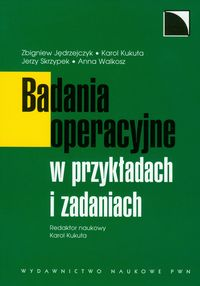

In [109]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyny:", "DETAL1","DETAL2","DETAL3","DETAL4","DETAL5", "czas", "koszt H"]
table.append_row(["masz S1", 75,    60,   150,  30, 96,'<=10800 min', 30 ])
table.append_row(["masz S2", 80,    100,  120,  32, 100,'<=10800 min', 42 ])
table.append_row(["masz S3", 48,    50,   160,   40, 120,'<=10800 min' , 36])
table.append_row(["detALe", ">=90",   ">=90",  ">=90",  ">=75",">=75",0, 0 ])
print(table)

+---------+--------+--------+--------+--------+--------+--------------+--------+
| Maszyny | DETAL1 | DETAL2 | DETAL3 | DETAL4 | DETAL5 |     czas     | koszt  |
|    :    |        |        |        |        |        |              |   H    |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S1 |   75   |   60   |  150   |   30   |   96   | <=10800 min  |   30   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S2 |   80   |  100   |  120   |   32   |  100   | <=10800 min  |   42   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S3 |   48   |   50   |  160   |   40   |  120   | <=10800 min  |   36   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| detALe  |  >=90  |  >=90  |  >=90  |  >=75  |  >=75  |      0       |   0    |
+---------+--------+--------+--------+--------+--------+--------------+--------+


## Jaka jest funkcja celu (czyli czym jest x)?

Rodzielić produkcję detali pomiedzy maszyny - <span style="font-size: 150%;color:#0000ff">czyli xij to znaczy ile i-tych detali będzie wyprodukowanych na j-tych maszynach.</span>

W tabelce jest ilość minut potrzebnych na wyprodukowanie jednego detalu. 
Czyli jak mamy ograniczenie czasu równe: 10800 minut. Ponieważ liczby wewnątrz tabeli pokazują czas produkcji jednego detalu, to iloczyn czasu i ilości detali x daje nam sumę czasu dla każdego detalu. Dlatego:

### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin

#### $
\left\{
\begin{align} 
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}} & \leqslant 10800 & (1)\\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}} & \leqslant 10800 & (2)\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}} & \leqslant 10800 & (3)\\
\end{align}
\right. 
$







### Kolejny warunek:  Ilość detali ma przekraczać 90 i 75 sztuk
ponieważ x oznacza ilość i-tych sztuk detali na j-tej maszynie wieć suma ilości sztuk detalu na maszyne wyniesie:

$
{75x_{11}+80x_{21}+48x_{31}} \geqslant 90\\
{60x_{12}+100x_{22}+50x_{32}} \geqslant 90
$





<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<span style="font-size: 150%;color:#000000">Rodzielić produkcję detali pomiedzy maszyny przy najniższych kosztach dzierżawy maszyn </span>
Celem ukrytym jest minimalizowanie czasu pracy maszyn więc musiby wziąć ograniczenia czasowe (nie ograniczenia ilości detali) dlatego mnoży się tu przez czasy produkcji detali.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j}) =30(75x_{1} + 60x_{2}+ 150x_{3}+ 30x_{4}+ 96x_{5})+42(80x_{1} + 100x_{2}+ 120x_{3}+ 32x_{4}+ 100x_{5})+36(48x_{1} + 50x_{2}+ 160x_{3}+ 40x_{4}+ 120x_{5})   \to  min 
\qquad 
} $


### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin

#### $
\left\{
\begin{align} 
{75x_{11}+60x_{12}+150x_{13}+30x_{14}+96x_{15}} & \leqslant 10800 & (1)\\
{80x_{21}+100x_{22}+120x_{23}+32x_{24}+100x_{25}} & \leqslant 10800 & (2)\\
{48x_{31}+50x_{32}+160x_{33}+40x_{34}+120x_{35}} & \leqslant 10800 & (3)\\
\end{align}
\right. 
$

### Drugie ograniczenie: należy wyprodukować conajmniej po 90 detali: 1,2 i 3 
dla maszyny S1

$
{x_{11}+x_{21}+x_{31}} \geqslant 90
$

dla maszyny S2

$
{x_{12}+x_{22}+x_{32}} \geqslant 90
$

dla maszyny S3

$
{x_{13}+x_{23}+x_{33}} \geqslant 90
$

In [108]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyny:", "DETAL1","DETAL2","DETAL3","DETAL4","DETAL5", "czas", "koszt H"]
table.append_row(["masz S1", 75,    60,   150,  30, 96,'<=10800 min', 30 ])
table.append_row(["masz S2", 80,    100,  120,  32, 100,'<=10800 min', 42 ])
table.append_row(["masz S3", 48,    50,   160,   40, 120,'<=10800 min' , 36])
table.append_row(["detALe", ">=90",   ">=90",  ">=90",  ">=75",">=75",0, 0 ])
print(table)

+---------+--------+--------+--------+--------+--------+--------------+--------+
| Maszyny | DETAL1 | DETAL2 | DETAL3 | DETAL4 | DETAL5 |     czas     | koszt  |
|    :    |        |        |        |        |        |              |   H    |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S1 |   75   |   60   |  150   |   30   |   96   | <=10800 min  |   30   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S2 |   80   |  100   |  120   |   32   |  100   | <=10800 min  |   42   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| masz S3 |   48   |   50   |  160   |   40   |  120   | <=10800 min  |   36   |
+---------+--------+--------+--------+--------+--------+--------------+--------+
| detALe  |  >=90  |  >=90  |  >=90  |  >=75  |  >=75  |      0       |   0    |
+---------+--------+--------+--------+--------+--------+--------------+--------+


## Celem jest minimalizacja kosztów dzierżawy

$ 
{
F(x_1,x_2,x_3) =30(75x_{1} + 60x_{2}+ 150x_{3}+ 30x_{4}+ 96x_{5})+42(80x_{1} + 100x_{2}+ 120x_{3}+ 32x_{4}+ 100x_{5})+36(48x_{1} + 50x_{2}+ 160x_{3}+ 40x_{4}+ 120x_{5})   \to  min 
} 
$

In [18]:
from pulp import *

# Tworze listę maszyn
Warehouses = ["maszyna_s1","maszyna_s2","maszyna_s3"]

# Tworze słownik ile każda maszyna może maksymalnie pracować tyle godzin
supply = {"maszyna_s1": 10800,
          "maszyna_s2": 10800,
          "maszyna_s3": 10800}

In [19]:
# Tworzę listę odbiorców
Bars = ["detal_A", "detal_B", "detal_C","detal_D","detal_E"]

# minimalna ilość dostarczonych detali
demand = {"detal_A": 90,
        "detal_B": 90,
        "detal_C": 90,
        "detal_D": 75,
        "detal_E": 75  
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['maszyna_s1', 'maszyna_s2', 'maszyna_s3']
supply: {'maszyna_s1': 10800, 'maszyna_s2': 10800, 'maszyna_s3': 10800}
Bars: ['detal_A', 'detal_B', 'detal_C', 'detal_D', 'detal_E']
Demand: {'detal_A': 90, 'detal_B': 90, 'detal_C': 90, 'detal_D': 75, 'detal_E': 75}


### <span style="color:blue"> Są w różnych kategoriach. maszyny są w minutach, detale są w sztukach

In [20]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszyny:", "wydajność dla: x1","wydajność dla: x2","wydajność dla: x3","wydajność dla: x4","wydajność dla: x5", "Maksymalny czas pracy maszyn w min.", "koszt godzinowy maszyny"]
table.append_row(["maszyna S1", '75 min/detal',    '60min/detal',   '150 min/detal',  '30 min/detal', '96 min/detal','<=10800 minut', "30 zł/h" ])
table.append_row(["maszyna S2", '80 min/detal',    '100 min/detal',  '120 min/detal'  ,  '32 min/detal', '100 min/detal','<=10800 minut', "42 zł/h" ])
table.append_row(["maszyna S3", '48 min/detal',    '50 min/detal',   '160 min/detal',   '40 min/detal', '120 min/detal','<=10800 minut' , "36 zł/h"])
table.append_row(["Minimalna ilość detali", ">= 90 sztuk",   ">= 90 sztuk",  ">= 90 sztuk",  ">= 75 sztuk",">= 75 sztuk",0, 0 ])
print(table)

+----------+--------+---------+-------+-------+-------+--------------+---------+
| Maszyny: | wydajn | wydajno | wydaj | wydaj | wydaj | Maksymalny c | koszt g |
|          | ość dl | ść dla: | ność  | ność  | ność  | zas pracy ma | odzinow |
|          | a: x1  |    x2   | dla:  | dla:  | dla:  | szyn w min.  | y maszy |
|          |        |         |  x3   |  x4   |  x5   |              |   ny    |
+----------+--------+---------+-------+-------+-------+--------------+---------+
| maszyna  | 75 min | 60min/d | 150 m | 30 mi | 96 mi | <=10800 minu | 30 zł/h |
|    S1    | /detal |  etal   | in/de | n/det | n/det |      t       |         |
|          |        |         |  tal  |  al   |  al   |              |         |
+----------+--------+---------+-------+-------+-------+--------------+---------+
| maszyna  | 80 min | 100 min | 120 m | 32 mi | 100 m | <=10800 minu | 42 zł/h |
|    S2    | /detal | /detal  | in/de | n/det | in/de |      t       |         |
|          |        |       

In [21]:

        #detale
        # 1  2  3 F  
costs = [   
        [75, 60, 150, 30, 96,0], #A  Maszyny
        [80,100, 120, 32,100,0],  #B
        [48, 50, 160, 40,120,0]
         ]

In [22]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'maszyna_s1': {'detal_A': 75,
  'detal_B': 60,
  'detal_C': 150,
  'detal_D': 30,
  'detal_E': 96},
 'maszyna_s2': {'detal_A': 80,
  'detal_B': 100,
  'detal_C': 120,
  'detal_D': 32,
  'detal_E': 100},
 'maszyna_s3': {'detal_A': 48,
  'detal_B': 50,
  'detal_C': 160,
  'detal_D': 40,
  'detal_E': 120}}

In [23]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [24]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('maszyna_s1', 'detal_A'), ('maszyna_s1', 'detal_B'), ('maszyna_s1', 'detal_C'), ('maszyna_s1', 'detal_D'), ('maszyna_s1', 'detal_E'), ('maszyna_s2', 'detal_A'), ('maszyna_s2', 'detal_B'), ('maszyna_s2', 'detal_C'), ('maszyna_s2', 'detal_D'), ('maszyna_s2', 'detal_E'), ('maszyna_s3', 'detal_A'), ('maszyna_s3', 'detal_B'), ('maszyna_s3', 'detal_C'), ('maszyna_s3', 'detal_D'), ('maszyna_s3', 'detal_E')]


In [25]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'maszyna_s1': {'detal_A': Route_maszyna_s1_detal_A,
  'detal_B': Route_maszyna_s1_detal_B,
  'detal_C': Route_maszyna_s1_detal_C,
  'detal_D': Route_maszyna_s1_detal_D,
  'detal_E': Route_maszyna_s1_detal_E},
 'maszyna_s2': {'detal_A': Route_maszyna_s2_detal_A,
  'detal_B': Route_maszyna_s2_detal_B,
  'detal_C': Route_maszyna_s2_detal_C,
  'detal_D': Route_maszyna_s2_detal_D,
  'detal_E': Route_maszyna_s2_detal_E},
 'maszyna_s3': {'detal_A': Route_maszyna_s3_detal_A,
  'detal_B': Route_maszyna_s3_detal_B,
  'detal_C': Route_maszyna_s3_detal_C,
  'detal_D': Route_maszyna_s3_detal_D,
  'detal_E': Route_maszyna_s3_detal_E}}

In [26]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

    # The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [27]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_maszyna_s1_detal_A,
 Route_maszyna_s1_detal_B,
 Route_maszyna_s1_detal_C,
 Route_maszyna_s1_detal_D,
 Route_maszyna_s1_detal_E,
 Route_maszyna_s2_detal_A,
 Route_maszyna_s2_detal_B,
 Route_maszyna_s2_detal_C,
 Route_maszyna_s2_detal_D,
 Route_maszyna_s2_detal_E,
 Route_maszyna_s3_detal_A,
 Route_maszyna_s3_detal_B,
 Route_maszyna_s3_detal_C,
 Route_maszyna_s3_detal_D,
 Route_maszyna_s3_detal_E]

In [28]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [29]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_maszyna_s1_detal_A = 0.0
Route_maszyna_s1_detal_B = 0.0
Route_maszyna_s1_detal_C = 0.0
Route_maszyna_s1_detal_D = 75.0
Route_maszyna_s1_detal_E = 75.0
Route_maszyna_s2_detal_A = 0.0
Route_maszyna_s2_detal_B = 0.0
Route_maszyna_s2_detal_C = 90.0
Route_maszyna_s2_detal_D = 0.0
Route_maszyna_s2_detal_E = 0.0
Route_maszyna_s3_detal_A = 90.0
Route_maszyna_s3_detal_B = 90.0
Route_maszyna_s3_detal_C = 0.0
Route_maszyna_s3_detal_D = 0.0
Route_maszyna_s3_detal_E = 0.0


In [30]:
# The optimised objective function value is printed to the screen    
print("Koszt produkcji = ", value(prob.objective))

Koszt produkcji =  29070.0


## Celem jest minimalizacja kosztów dzierżawy

$ 
{
F(x_1,x_2,x_3) =30(75x_{1} + 60x_{2}+ 150x_{3}+ 30x_{4}+ 96x_{5})+42(80x_{1} + 100x_{2}+ 120x_{3}+ 32x_{4}+ 100x_{5})+36(48x_{1} + 50x_{2}+ 160x_{3}+ 40x_{4}+ 120x_{5})   \to  min 
} 
$

## Koszt dzierżawy maszyn płatne za godzinę użytkowania maszyn

In [31]:
(30*30+30*96)+(45*120)+(36*90+36*90)

15660

# <span style="color:blue"> Przyklad 22 STR. 135

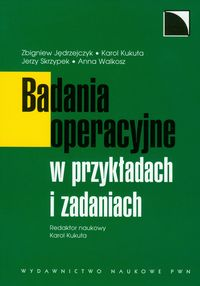

In [111]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Sekretarki", "PRACA: x1","PRACA: x2","PRACA: x3","PRACA: x4", "max Il. pracy"]
table.append_row(["Sekretarka_1", 420,    480,   240,  360, 1  ])
table.append_row(["Sekretarka_2", 480,    420,   300,  360, 1  ])
table.append_row(["Sekretarka_3", 420,    540,   300,  420, 1  ])
table.append_row(["Sekretarka_4", 360,    480,   360,  480, 1  ])
print(table)

+--------------+-----------+-----------+-----------+-----------+---------------+
|  Sekretarki  | PRACA: x1 | PRACA: x2 | PRACA: x3 | PRACA: x4 | max Il. pracy |
+--------------+-----------+-----------+-----------+-----------+---------------+
| Sekretarka_1 |    420    |    480    |    240    |    360    |       1       |
+--------------+-----------+-----------+-----------+-----------+---------------+
| Sekretarka_2 |    480    |    420    |    300    |    360    |       1       |
+--------------+-----------+-----------+-----------+-----------+---------------+
| Sekretarka_3 |    420    |    540    |    300    |    420    |       1       |
+--------------+-----------+-----------+-----------+-----------+---------------+
| Sekretarka_4 |    360    |    480    |    360    |    480    |       1       |
+--------------+-----------+-----------+-----------+-----------+---------------+


### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin
## KAŻDA SEKRETARKA MUSI DOSTAĆ JEDNĄ PRACĘ = 1, 

## KAŻDA PRACA MUSI BYĆ WYKONANA = 1

<span style="font-size: 120%;color:#0000ff"> KAŻDA SEKRETARKA MUSI DOSTAĆ TYLKO JEDNĄ PRACĘ = 1  </span> 

$
\left\{
\begin{align} 
{420x_{11}+480x_{12}+240x_{13}+360x_{14}} & = 1 & (1)\\
{480x_{21}+420x_{22}+300x_{23}+360x_{24}} & = 1 & (2)\\
{420x_{31}+540x_{32}+300x_{33}+420x_{34}} & = 1 & (3)\\
{360x_{31}+480x_{32}+360x_{33}+480x_{34}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 120%;color:#0000ff"> KAŻDA PRACA MUSI BYĆ WYKONANA = 1 </span>

$
\left\{
\begin{align} 
{420x_{11}+480x_{21}+420x_{31}+360x_{41}} & = 1 & (5)\\
{480x_{12}+420x_{22}+540x_{32}+480x_{42}} & = 1 & (6)\\
{240x_{13}+300x_{23}+300x_{33}+360x_{43}} & = 1 & (7)\\
{360x_{11}+360x_{22}+420x_{33}+480x_{44}} & = 1 & (8)\\
\end{align}
\right. 
$

In [33]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["SEKRETARKA:", "PRACA: x1","PRACA: x2","PRACA: x3","PRACA: x4", "Każda praca musi zostać wykonana"]
table.append_row(["SEKRETARKA_1", 420,    480,   240,  360, 1  ])
table.append_row(["SEKRETARKA_2", 480,    420,   300,  360, 1  ])
table.append_row(["SEKRETARKA_3", 420,    540,   300,  420, 1  ])
table.append_row(["SEKRETARKA_4", 360,    480,   360,  480, 1  ])
table.append_row(["max Ilość pracy wykonywanej przez sekretarki", 1,    1,   1,  1, 1  ])
print(table)

+-----------------+-----------+-----------+-----------+-----------+------------+
|   SEKRETARKA:   | PRACA: x1 | PRACA: x2 | PRACA: x3 | PRACA: x4 | Każda prac |
|                 |           |           |           |           | a musi zos |
|                 |           |           |           |           | tać wykona |
|                 |           |           |           |           |     na     |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_1   |    420    |    480    |    240    |    360    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_2   |    480    |    420    |    300    |    360    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_3   |    420    |    540    |    300    |    420    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_4   |    360  

## Celem jest minimalizacja łącznego czasu pracy sekretarek

$ 
{
F(x_{i,j}) =420x_{11} + 480x_{12}+ 240x_{13}+ 360x_{14}\\+ 480x_{21}+420x_{22} + 300x_{23}+ 360x_{24}\\+ 420x_{31}+ 540x_{32}+300x_{33} + 420x_{34}+ 360x_{41}\\+ 480x_{42}+ 360x_{43}+480x_{44}   \to  min 
} 
$

In [34]:
from pulp import *

# Tworze listę sekretarek
Warehouses = ["sekretarka_1","sekretarka_2","sekretarka_3","sekretarka_4"]

# Tworze słownik ile każdej pracy trzeba wykonać
supply = {"sekretarka_1": 1,
          "sekretarka_2": 1,
          "sekretarka_3": 1,
         "sekretarka_4": 1}

In [35]:
# Tworzę listę odbiorców
Bars = ["Praca_1", "Praca_2", "Praca_3","Praca_4"]

# minimalna ilość dostarczonych detali
demand = {"Praca_1": 1,
        "Praca_2": 1,
        "Praca_3": 1,
        "Praca_4": 1  
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['sekretarka_1', 'sekretarka_2', 'sekretarka_3', 'sekretarka_4']
supply: {'sekretarka_1': 1, 'sekretarka_2': 1, 'sekretarka_3': 1, 'sekretarka_4': 1}
Bars: ['Praca_1', 'Praca_2', 'Praca_3', 'Praca_4']
Demand: {'Praca_1': 1, 'Praca_2': 1, 'Praca_3': 1, 'Praca_4': 1}


In [36]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["SEKRETARKA:", "PRACA: x1","PRACA: x2","PRACA: x3","PRACA: x4", "Każda praca musi zostać wykonana"]
table.append_row(["SEKRETARKA_1", 420,    480,   240,  360, 1  ])
table.append_row(["SEKRETARKA_2", 480,    420,   300,  360, 1  ])
table.append_row(["SEKRETARKA_3", 420,    540,   300,  420, 1  ])
table.append_row(["SEKRETARKA_4", 360,    480,   360,  480, 1  ])
table.append_row(["max Ilość pracy wykonywanej przez sekretarki", 1,    1,   1,  1, 1  ])
print(table)

+-----------------+-----------+-----------+-----------+-----------+------------+
|   SEKRETARKA:   | PRACA: x1 | PRACA: x2 | PRACA: x3 | PRACA: x4 | Każda prac |
|                 |           |           |           |           | a musi zos |
|                 |           |           |           |           | tać wykona |
|                 |           |           |           |           |     na     |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_1   |    420    |    480    |    240    |    360    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_2   |    480    |    420    |    300    |    360    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_3   |    420    |    540    |    300    |    420    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_4   |    360  

In [37]:

        #piekarnie
        # 1  2  3 F  
costs = [   
        [420, 480, 240, 360, 1], #A  Magazyny
        [480, 420, 300, 360, 1],  #B
        [420, 540, 300, 420, 1],
        [360, 480, 360, 480, 1]
         ]

In [38]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'sekretarka_1': {'Praca_1': 420,
  'Praca_2': 480,
  'Praca_3': 240,
  'Praca_4': 360},
 'sekretarka_2': {'Praca_1': 480,
  'Praca_2': 420,
  'Praca_3': 300,
  'Praca_4': 360},
 'sekretarka_3': {'Praca_1': 420,
  'Praca_2': 540,
  'Praca_3': 300,
  'Praca_4': 420},
 'sekretarka_4': {'Praca_1': 360,
  'Praca_2': 480,
  'Praca_3': 360,
  'Praca_4': 480}}

In [39]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [40]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('sekretarka_1', 'Praca_1'), ('sekretarka_1', 'Praca_2'), ('sekretarka_1', 'Praca_3'), ('sekretarka_1', 'Praca_4'), ('sekretarka_2', 'Praca_1'), ('sekretarka_2', 'Praca_2'), ('sekretarka_2', 'Praca_3'), ('sekretarka_2', 'Praca_4'), ('sekretarka_3', 'Praca_1'), ('sekretarka_3', 'Praca_2'), ('sekretarka_3', 'Praca_3'), ('sekretarka_3', 'Praca_4'), ('sekretarka_4', 'Praca_1'), ('sekretarka_4', 'Praca_2'), ('sekretarka_4', 'Praca_3'), ('sekretarka_4', 'Praca_4')]


In [41]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'sekretarka_1': {'Praca_1': Route_sekretarka_1_Praca_1,
  'Praca_2': Route_sekretarka_1_Praca_2,
  'Praca_3': Route_sekretarka_1_Praca_3,
  'Praca_4': Route_sekretarka_1_Praca_4},
 'sekretarka_2': {'Praca_1': Route_sekretarka_2_Praca_1,
  'Praca_2': Route_sekretarka_2_Praca_2,
  'Praca_3': Route_sekretarka_2_Praca_3,
  'Praca_4': Route_sekretarka_2_Praca_4},
 'sekretarka_3': {'Praca_1': Route_sekretarka_3_Praca_1,
  'Praca_2': Route_sekretarka_3_Praca_2,
  'Praca_3': Route_sekretarka_3_Praca_3,
  'Praca_4': Route_sekretarka_3_Praca_4},
 'sekretarka_4': {'Praca_1': Route_sekretarka_4_Praca_1,
  'Praca_2': Route_sekretarka_4_Praca_2,
  'Praca_3': Route_sekretarka_4_Praca_3,
  'Praca_4': Route_sekretarka_4_Praca_4}}

In [42]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")    

[Route_sekretarka_1_Praca_1,
 Route_sekretarka_1_Praca_2,
 Route_sekretarka_1_Praca_3,
 Route_sekretarka_1_Praca_4,
 Route_sekretarka_2_Praca_1,
 Route_sekretarka_2_Praca_2,
 Route_sekretarka_2_Praca_3,
 Route_sekretarka_2_Praca_4,
 Route_sekretarka_3_Praca_1,
 Route_sekretarka_3_Praca_2,
 Route_sekretarka_3_Praca_3,
 Route_sekretarka_3_Praca_4,
 Route_sekretarka_4_Praca_1,
 Route_sekretarka_4_Praca_2,
 Route_sekretarka_4_Praca_3,
 Route_sekretarka_4_Praca_4]

In [43]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [44]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_sekretarka_1_Praca_1 = 0.0
Route_sekretarka_1_Praca_2 = 0.0
Route_sekretarka_1_Praca_3 = 0.0
Route_sekretarka_1_Praca_4 = 1.0
Route_sekretarka_2_Praca_1 = 0.0
Route_sekretarka_2_Praca_2 = 1.0
Route_sekretarka_2_Praca_3 = 0.0
Route_sekretarka_2_Praca_4 = 0.0
Route_sekretarka_3_Praca_1 = 0.0
Route_sekretarka_3_Praca_2 = 0.0
Route_sekretarka_3_Praca_3 = 1.0
Route_sekretarka_3_Praca_4 = 0.0
Route_sekretarka_4_Praca_1 = 1.0
Route_sekretarka_4_Praca_2 = 0.0
Route_sekretarka_4_Praca_3 = 0.0
Route_sekretarka_4_Praca_4 = 0.0


In [45]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  1440.0


<span style="font-size: 100%;color:#0000ff"> Rozwiązanie: 
   - Sekretarka_1 ma wykonać pracę 4
   - Sekretarka_2 ma wykonać pracę 2
   - Sekretarka_3 ma wykonać pracę 3
   - Sekretarka_4 ma wykonać pracę 1
    
<span style="font-size: 100%;color:#0000ff">Łączny czas wykonania prac wynosi 1440 minut

# <span style="color:blue"> Przyklad 23 STR. 138

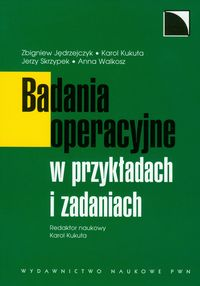

In [46]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Pracownicy:", "Kontrakt: x1","Kontrakt: x2","Kontrakt: x3","Kontrakt: x4", "max Ilość kontraktów na pracownika"]
table.append_row(["Pracownik A", 10,     7,    6,   8, 1  ])
table.append_row(["Pracownik B", 12,    14,   10,  17, 1  ])
table.append_row(["Pracownik C",  3,     5,    8,   4, 1  ])
table.append_row(["Ilość kontraktów=1",  1,     1,    1,   1, 1  ])
print(table)

+------------+---------+----------+---------+---------+------------------------+
| Pracownicy | Kontrak | Kontrakt | Kontrak | Kontrak | max Ilość kontraktów n |
|     :      |  t: x1  |   : x2   |  t: x3  |  t: x4  |      a pracownika      |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   10    |    7     |    6    |    8    |           1            |
|     A      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   12    |    14    |   10    |   17    |           1            |
|     B      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |    3    |    5     |    8    |    4    |           1            |
|     C      |         |          |         |         |                        |
+------------+---------+----

### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin
## KAŻDA SEKRETARKA MUSI DOSTAĆ JEDNĄ PRACĘ = 1, 

## KAŻDA PRACA MUSI BYĆ WYKONANA = 1

# <span style="font-size: 120%;color:#0000ff"> KAŻDY EXPERT MUSI DOSTAĆ TYLKO JEDen KONTRAKT = 1  </span> 

$
\left\{
\begin{align} 
{10x_{11}+7x_{12}+6x_{13}+8x_{14}} & = 1 & (1)\\
{12x_{21}+14x_{22}+10x_{23}+17x_{24}} & = 1 & (2)\\
{3x_{31}+5x_{32}+8x_{33}+4x_{34}} & = 1 & (3)\\
\end{align}
\right. 
$

<span style="font-size: 120%;color:#0000ff"> KAŻDy KONTRAKT musi BYĆ WYKONANA = 1 </span>

$
\left\{
\begin{align} 
{10x_{11}+12x_{21}+3x_{31}} & = 1 & (5)\\
{7x_{12}+14x_{22}+5x_{32}} & = 1 & (6)\\
{6x_{13}+10x_{23}+8x_{33}} & = 1 & (7)\\
{8x_{11}+17x_{22}+4x_{33}} & = 1 & (8)\\
\end{align}
\right. 
$

In [47]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Pracownicy:", "Kontrakt: x1","Kontrakt: x2","Kontrakt: x3","Kontrakt: x4", "max Ilość kontraktów na pracownika"]
table.append_row(["Pracownik A", 10,     7,    6,   8, 1  ])
table.append_row(["Pracownik B", 12,    14,   10,  17, 1  ])
table.append_row(["Pracownik C",  3,     5,    8,   4, 1  ])
table.append_row(["Ilość kontraktów=1",  1,     1,    1,   1, 1  ])
print(table)

+------------+---------+----------+---------+---------+------------------------+
| Pracownicy | Kontrak | Kontrakt | Kontrak | Kontrak | max Ilość kontraktów n |
|     :      |  t: x1  |   : x2   |  t: x3  |  t: x4  |      a pracownika      |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   10    |    7     |    6    |    8    |           1            |
|     A      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   12    |    14    |   10    |   17    |           1            |
|     B      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |    3    |    5     |    8    |    4    |           1            |
|     C      |         |          |         |         |                        |
+------------+---------+----

# Celem jest maksymalizacja łącznego zysku z kontraktów

$ 
{
F(x_{i,j}) =10x_{11} + 7x_{12}+ 6x_{13}+ 8x_{14}\\+ 12x_{21}+14x_{22} + 10x_{23}+ 17x_{24}\\+ 3x_{31}+ 5x_{32}+8x_{33} + 4x_{34}   \to  max 
} 
$

In [48]:
from pulp import *

# Tworze listę sekretarek
Warehouses = ["Pracownik_1","Pracownik_2","Pracownik_3"]

# Tworze słownik ile każdej pracy trzeba wykonać
supply = {"Pracownik_1": 1,
          "Pracownik_2": 1,
          "Pracownik_3": 1
         }

In [49]:
# Tworzę listę odbiorców
Bars = ["Kontrakt_1", "Kontrakt_2", "Kontrakt_3","Kontrakt_4"]

# minimalna ilość dostarczonych detali
demand = {"Kontrakt_1": 1,
        "Kontrakt_2": 1,
        "Kontrakt_3": 1,
        "Kontrakt_4": 1  
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Pracownik_1', 'Pracownik_2', 'Pracownik_3']
supply: {'Pracownik_1': 1, 'Pracownik_2': 1, 'Pracownik_3': 1}
Bars: ['Kontrakt_1', 'Kontrakt_2', 'Kontrakt_3', 'Kontrakt_4']
Demand: {'Kontrakt_1': 1, 'Kontrakt_2': 1, 'Kontrakt_3': 1, 'Kontrakt_4': 1}


In [50]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Pracownicy:", "Kontrakt: x1","Kontrakt: x2","Kontrakt: x3","Kontrakt: x4", "max Ilość kontraktów na pracownika"]
table.append_row(["Pracownik A", 10,     7,    6,   8, 1  ])
table.append_row(["Pracownik B", 12,    14,   10,  17, 1  ])
table.append_row(["Pracownik C",  3,     5,    8,   4, 1  ])
table.append_row(["Ilość kontraktów=1",  1,     1,    1,   1, 1  ])
print(table)

+------------+---------+----------+---------+---------+------------------------+
| Pracownicy | Kontrak | Kontrakt | Kontrak | Kontrak | max Ilość kontraktów n |
|     :      |  t: x1  |   : x2   |  t: x3  |  t: x4  |      a pracownika      |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   10    |    7     |    6    |    8    |           1            |
|     A      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   12    |    14    |   10    |   17    |           1            |
|     B      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |    3    |    5     |    8    |    4    |           1            |
|     C      |         |          |         |         |                        |
+------------+---------+----

In [51]:

        #piekarnie
        # 1  2  3 F  
costs = [   
        [10,  7,  6,  8, 1], #A  Magazyny
        [12, 14, 10, 17, 1],  #B
        [3 ,  5,  8,  4, 1]
         ]

In [52]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Pracownik_1': {'Kontrakt_1': 10,
  'Kontrakt_2': 7,
  'Kontrakt_3': 6,
  'Kontrakt_4': 8},
 'Pracownik_2': {'Kontrakt_1': 12,
  'Kontrakt_2': 14,
  'Kontrakt_3': 10,
  'Kontrakt_4': 17},
 'Pracownik_3': {'Kontrakt_1': 3,
  'Kontrakt_2': 5,
  'Kontrakt_3': 8,
  'Kontrakt_4': 4}}

In [53]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMaximize)
print(prob)

Beer_Distribution_Problem:
MAXIMIZE
None
VARIABLES



In [54]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Pracownik_1', 'Kontrakt_1'), ('Pracownik_1', 'Kontrakt_2'), ('Pracownik_1', 'Kontrakt_3'), ('Pracownik_1', 'Kontrakt_4'), ('Pracownik_2', 'Kontrakt_1'), ('Pracownik_2', 'Kontrakt_2'), ('Pracownik_2', 'Kontrakt_3'), ('Pracownik_2', 'Kontrakt_4'), ('Pracownik_3', 'Kontrakt_1'), ('Pracownik_3', 'Kontrakt_2'), ('Pracownik_3', 'Kontrakt_3'), ('Pracownik_3', 'Kontrakt_4')]


In [55]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Pracownik_1': {'Kontrakt_1': Route_Pracownik_1_Kontrakt_1,
  'Kontrakt_2': Route_Pracownik_1_Kontrakt_2,
  'Kontrakt_3': Route_Pracownik_1_Kontrakt_3,
  'Kontrakt_4': Route_Pracownik_1_Kontrakt_4},
 'Pracownik_2': {'Kontrakt_1': Route_Pracownik_2_Kontrakt_1,
  'Kontrakt_2': Route_Pracownik_2_Kontrakt_2,
  'Kontrakt_3': Route_Pracownik_2_Kontrakt_3,
  'Kontrakt_4': Route_Pracownik_2_Kontrakt_4},
 'Pracownik_3': {'Kontrakt_1': Route_Pracownik_3_Kontrakt_1,
  'Kontrakt_2': Route_Pracownik_3_Kontrakt_2,
  'Kontrakt_3': Route_Pracownik_3_Kontrakt_3,
  'Kontrakt_4': Route_Pracownik_3_Kontrakt_4}}

In [56]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")    

[Route_Pracownik_1_Kontrakt_1,
 Route_Pracownik_1_Kontrakt_2,
 Route_Pracownik_1_Kontrakt_3,
 Route_Pracownik_1_Kontrakt_4,
 Route_Pracownik_2_Kontrakt_1,
 Route_Pracownik_2_Kontrakt_2,
 Route_Pracownik_2_Kontrakt_3,
 Route_Pracownik_2_Kontrakt_4,
 Route_Pracownik_3_Kontrakt_1,
 Route_Pracownik_3_Kontrakt_2,
 Route_Pracownik_3_Kontrakt_3,
 Route_Pracownik_3_Kontrakt_4]

In [57]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Infeasible


In [58]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Pracownik_1_Kontrakt_1 = 1.0
Route_Pracownik_1_Kontrakt_2 = 0.0
Route_Pracownik_1_Kontrakt_3 = 0.0
Route_Pracownik_1_Kontrakt_4 = 0.0
Route_Pracownik_2_Kontrakt_1 = 0.0
Route_Pracownik_2_Kontrakt_2 = 0.0
Route_Pracownik_2_Kontrakt_3 = 0.0
Route_Pracownik_2_Kontrakt_4 = 1.0
Route_Pracownik_3_Kontrakt_1 = 0.0
Route_Pracownik_3_Kontrakt_2 = 1.0
Route_Pracownik_3_Kontrakt_3 = 0.0
Route_Pracownik_3_Kontrakt_4 = 0.0


In [59]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  32.0


<span style="font-size: 100%;color:#0000ff"> Rozwiązanie: 
   - Pracownik_1 ma wykonać kontrakt 1
   - Pracownik_2 ma wykonać kontrakt 4
   - Pracownik_3 ma wykonać kontrakt 2
    
<span style="font-size: 100%;color:#0000ff">Łączny maksymalny zysk z wykonania prac wynosi 32 tys. zł

# <span style="color:blue"> Zadanie 84 STR. 141

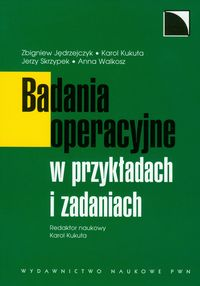

In [60]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Warsztaty:", "Detal: A","Detal: B","Detal: C","Detal: D","Detal: E", "Max ilość zmian"]
table.append_row(["Warsztat 1",  20,    15,   18 ,  5, 6, 46 ])
table.append_row(["Warsztat 2",  22,    20,   10 ,  5, 3, 46 ])
table.append_row(["Warsztat 3",  19,    10,   20,  10, 8, 46 ])
table.append_row(["Minimalna liczba detali",  660,    360,   360,  420, 210, 0 ])
table.append_row(["Ceny detali",  20,    15,   18,  70, 110, 0 ])
print(table)

+-------------+----------+----------+----------+----------+----------+---------+
| Warsztaty:  | Detal: A | Detal: B | Detal: C | Detal: D | Detal: E | Max ilo |
|             |          |          |          |          |          | ść zmia |
|             |          |          |          |          |          |    n    |
+-------------+----------+----------+----------+----------+----------+---------+
| Warsztat 1  |    20    |    15    |    18    |    5     |    6     |   46    |
+-------------+----------+----------+----------+----------+----------+---------+
| Warsztat 2  |    22    |    20    |    10    |    5     |    3     |   46    |
+-------------+----------+----------+----------+----------+----------+---------+
| Warsztat 3  |    19    |    10    |    20    |    10    |    8     |   46    |
+-------------+----------+----------+----------+----------+----------+---------+
| Minimalna l |   660    |   360    |   360    |   420    |   210    |    0    |
| iczba detal |          |  

<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

Ilością zmian  - dlaczego? bo jest to zmienna decyzyjna, nie można sterować ilością produkcji na zmianę, ale można  sterować ilością zmian, ponieważ ilość zmian razy ilość detali produkowanych na zmianę daje na ilość produkcji. 


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

ilość detali produkowanych na zmianę 

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>

zmiennymi decyzyjnymi jest tutaj ilość zmian. mkasymalnie w miesiącu może być 46 zmian

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & \leqslant 46 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{25}} & \leqslant 46 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}} & \leqslant 46 & (3)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - nie związane bezpośrednio ze zmiennymi decyzyjnymi tutaj: ilości produkcji</span>

$
{20x_{11}+22x_{21}+19x_{31}} \geqslant 660 \\
{15x_{12}+20x_{22}+10x_{32}} \geqslant 360 \\ 
{18x_{13}+10x_{23}+20x_{33}} \geqslant 360 \\
{5x_{14}+10x_{24}+20x_{34}} \geqslant 420 \\
{6x_{15}+3x_{25}+8x_{35}} \geqslant 210 \\
$

<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Rozdzielić ilość zmian (bo jest to zmienna decyzyjna) w warsztatach aby zmaksymalizować miesięczną wartość produkcji.
zmienną decyzyjną jest x czyli ilość zmian. Ma być maksymalna wartość - wartość zależy od ilości produkcji wiec:

$\bbox[5px,border:1px solid red]
{
\\
F(x_1,x_2,x_3) =20({20x_{11}+22x_{21}+19x_{31}})+15({15x_{12}+20x_{22}+10x_{32}})+18({18x_{13}+10x_{23}+20x_{33}} )+70({5x_{14}+10x_{24}+20x_{34}})+110({6x_{15}+3x_{25}+8x_{35}})  \to  max 
\qquad 
} $

## Celem jest maksymalizacja łącznego zysku

$\bbox[5px,border:1px solid red]
{
\\
F(x_1,x_2,x_3) =20({20x_{11}+22x_{21}+19x_{31}})+15({15x_{12}+20x_{22}+10x_{32}})+18({18x_{13}+10x_{23}+20x_{33}} )+70({5x_{14}+10x_{24}+20x_{34}})+110({6x_{15}+3x_{25}+8x_{35}})  \to  max 
\qquad 
} $

In [61]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Zadanie 84 STR. 141",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [62]:
x11=LpVariable("x11",lowBound=0,upBound=None)
x12=LpVariable("x12",lowBound=0,upBound=None)
x13=LpVariable("x13",lowBound=0,upBound=None)
x14=LpVariable("x14",lowBound=0,upBound=None)
x15=LpVariable("x15",lowBound=0,upBound=None)
x21=LpVariable("x21",lowBound=0,upBound=None)
x22=LpVariable("x22",lowBound=0,upBound=None)
x23=LpVariable("x23",lowBound=0,upBound=None)
x24=LpVariable("x24",lowBound=0,upBound=None)
x25=LpVariable("x25",lowBound=0,upBound=None)
x31=LpVariable("x31",lowBound=0,upBound=None)
x32=LpVariable("x32",lowBound=0,upBound=None)
x33=LpVariable("x33",lowBound=0,upBound=None)
x34=LpVariable("x34",lowBound=0,upBound=None)
x35=LpVariable("x35",lowBound=0,upBound=None)        

### Dodajemy do platformy funkcje celu

 Celem jest maksymalizacja łącznego zysku

$\bbox[5px,border:1px solid red]
{
\\
F(x_1,x_2,x_3) =20({20x_{11}+22x_{21}+19x_{31}})+15({15x_{12}+20x_{22}+10x_{32}})+18({18x_{13}+10x_{23}+20x_{33}} )+70({5x_{14}+10x_{24}+20x_{34}})+110({6x_{15}+3x_{25}+8x_{35}})  \to  max 
\qquad 
} $






In [63]:
# objective function
prob += 20*(x11+x21+x31)+15*(x12+x22+x32)+18*(x13+x23+x33)+70*(x14+x24+x34)+110*(x15+x25+x35), "Maximum value of x1 + x2"

In [64]:
print(prob)

Zadanie_84_STR._141:
MAXIMIZE
20*x11 + 15*x12 + 18*x13 + 70*x14 + 110*x15 + 20*x21 + 15*x22 + 18*x23 + 70*x24 + 110*x25 + 20*x31 + 15*x32 + 18*x33 + 70*x34 + 110*x35 + 0
VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous



### Dodajemy do platformy główne warunki brzegowe

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & \leqslant 46 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{25}} & \leqslant 46 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}} & \leqslant 46 & (3)\\
\end{align}
\right. 
$

In [65]:
# main constraints
prob += x11 + x12 + x13 + x14 + x15 <= 46
prob += x21 + x22 + x23 + x24 + x25 <= 46
prob += x31 + x32 + x33 + x34 + x35 <= 46

In [66]:
print(prob)

Zadanie_84_STR._141:
MAXIMIZE
20*x11 + 15*x12 + 18*x13 + 70*x14 + 110*x15 + 20*x21 + 15*x22 + 18*x23 + 70*x24 + 110*x25 + 20*x31 + 15*x32 + 18*x33 + 70*x34 + 110*x35 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 + x15 <= 46

_C2: x21 + x22 + x23 + x24 + x25 <= 46

_C3: x31 + x32 + x33 + x34 + x35 <= 46

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous



$
{20x_{11}+22x_{21}+19x_{31}} \geqslant 660 \\
{15x_{12}+20x_{22}+10x_{32}} \geqslant 360 \\ 
{18x_{13}+10x_{23}+20x_{33}} \geqslant 360 \\
{5x_{14}+5x_{24}+10x_{34}} \geqslant 420 \\
{6x_{15}+3x_{25}+8x_{35}} \geqslant 210 \\
$

In [67]:
# main constraints
prob += 20*x11 + 22*x21 + 19*x31  >= 660
prob += 15*x12 + 20*x22 + 10*x32  >= 360
prob += 18*x13 + 10*x23 + 20*x33  >= 360
prob +=  5*x14 + 5*x24 +  10*x34  >= 420
prob +=  6*x15 + 3*x25 +   8*x35  >= 210

In [68]:
print(prob)

Zadanie_84_STR._141:
MAXIMIZE
20*x11 + 15*x12 + 18*x13 + 70*x14 + 110*x15 + 20*x21 + 15*x22 + 18*x23 + 70*x24 + 110*x25 + 20*x31 + 15*x32 + 18*x33 + 70*x34 + 110*x35 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 + x15 <= 46

_C2: x21 + x22 + x23 + x24 + x25 <= 46

_C3: x31 + x32 + x33 + x34 + x35 <= 46

_C4: 20 x11 + 22 x21 + 19 x31 >= 660

_C5: 15 x12 + 20 x22 + 10 x32 >= 360

_C6: 18 x13 + 10 x23 + 20 x33 >= 360

_C7: 5 x14 + 5 x24 + 10 x34 >= 420

_C8: 6 x15 + 3 x25 + 8 x35 >= 210

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous



### Rozwiązanie problemu

In [69]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve -1
Status: Infeasible


In [70]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 11/5
x12 = 0
x13 = 20
x14 = 0
x15 = 119/5
x21 = 28
x22 = 18
x23 = 0
x24 = 0
x25 = 0
x31 = 0
x32 = 0
x33 = 0
x34 = 188/5
x35 = 42/5


In [71]:
# maximum value of the objective function
print(f"max (x1 + x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x1 + x2) = 7408


# <span style="color:blue"> Przyklad 85 STR. 141

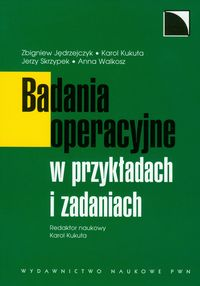

In [72]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Obrabiarki:", "czas produkcji: x1","czas produkcji: x2","czas produkcji: x3","czas produkcji: x4", "max czas pracy obrabiarek"]
table.append_row(["Obrabiarka A", 5,     2,   10,   12, 2500  ])
table.append_row(["Obrabiarka B", 10,    8,    2,    5, 10000  ])
table.append_row(["ObrabiarkA C", 15,    1,    5,    5, 2400  ])
table.append_row(["Ilość wyrobów",  200,     800,    200,   600, 0  ])
print(table)

+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar | czas produ | czas produk | czas prod | czas prod | max czas pracy |
|   ki:    |  kcji: x1  |   cji: x2   | ukcji: x3 | ukcji: x4 |   obrabiarek   |
+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar |     5      |      2      |    10     |    12     |      2500      |
|   ka A   |            |             |           |           |                |
+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar |     10     |      8      |     2     |     5     |     10000      |
|   ka B   |            |             |           |           |                |
+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar |     15     |      1      |     5     |     5     |      2400      |
|   kA C   |            |             |           |           |                |
+----------+------------+---

In [73]:
from pulp import *

# Tworze listę maszyn
Warehouses = ["Obrabiaka_1","Obrabiaka_2","Obrabiaka_3"]

# Tworze słownik ile każda maszyna może maksymalnie pracować tyle godzin
supply = {"Obrabiaka_1": 2500,
          "Obrabiaka_2": 10000,
          "Obrabiaka_3": 2400}

In [74]:
# Tworzę listę odbiorców
Bars = ["A", "B", "C","D"]

# minimalna ilość dostarczonych detali
demand = {"A": 200,
        "B": 800,
        "C": 200,
        "D": 600
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Obrabiaka_1', 'Obrabiaka_2', 'Obrabiaka_3']
supply: {'Obrabiaka_1': 2500, 'Obrabiaka_2': 10000, 'Obrabiaka_3': 2400}
Bars: ['A', 'B', 'C', 'D']
Demand: {'A': 200, 'B': 800, 'C': 200, 'D': 600}


In [75]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Obrabiarki:", "czas produkcji: x1","czas produkcji: x2","czas produkcji: x3","czas produkcji: x4", "max czas pracy obrabiarek"]
table.append_row(["Obrabiarka A", 5,     2,   10,   12, 2500  ])
table.append_row(["Obrabiarka B", 10,    8,    2,    5, 10000  ])
table.append_row(["ObrabiarkA C", 15,    1,    5,    5, 2400  ])
table.append_row(["Ilość wyrobów",  200,     800,    200,   600, 0  ])
print(table)

+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar | czas produ | czas produk | czas prod | czas prod | max czas pracy |
|   ki:    |  kcji: x1  |   cji: x2   | ukcji: x3 | ukcji: x4 |   obrabiarek   |
+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar |     5      |      2      |    10     |    12     |      2500      |
|   ka A   |            |             |           |           |                |
+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar |     10     |      8      |     2     |     5     |     10000      |
|   ka B   |            |             |           |           |                |
+----------+------------+-------------+-----------+-----------+----------------+
| Obrabiar |     15     |      1      |     5     |     5     |      2400      |
|   kA C   |            |             |           |           |                |
+----------+------------+---

In [76]:

        #piekarnie
        # 1  2  3 F  
costs = [   
        [5,2,10,12], #A  Magazyny
        [10,8,2,5],  #B
        [15,1,5,5]
         ]

In [77]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Obrabiaka_1': {'A': 5, 'B': 2, 'C': 10, 'D': 12},
 'Obrabiaka_2': {'A': 10, 'B': 8, 'C': 2, 'D': 5},
 'Obrabiaka_3': {'A': 15, 'B': 1, 'C': 5, 'D': 5}}

In [78]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [79]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Obrabiaka_1', 'A'), ('Obrabiaka_1', 'B'), ('Obrabiaka_1', 'C'), ('Obrabiaka_1', 'D'), ('Obrabiaka_2', 'A'), ('Obrabiaka_2', 'B'), ('Obrabiaka_2', 'C'), ('Obrabiaka_2', 'D'), ('Obrabiaka_3', 'A'), ('Obrabiaka_3', 'B'), ('Obrabiaka_3', 'C'), ('Obrabiaka_3', 'D')]


In [80]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Obrabiaka_1': {'A': Route_Obrabiaka_1_A,
  'B': Route_Obrabiaka_1_B,
  'C': Route_Obrabiaka_1_C,
  'D': Route_Obrabiaka_1_D},
 'Obrabiaka_2': {'A': Route_Obrabiaka_2_A,
  'B': Route_Obrabiaka_2_B,
  'C': Route_Obrabiaka_2_C,
  'D': Route_Obrabiaka_2_D},
 'Obrabiaka_3': {'A': Route_Obrabiaka_3_A,
  'B': Route_Obrabiaka_3_B,
  'C': Route_Obrabiaka_3_C,
  'D': Route_Obrabiaka_3_D}}

In [81]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

# The problem is solved using PuLP's choice of Solver
print('prob.solve',prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [82]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Obrabiaka_1_A = 200.0
Route_Obrabiaka_1_B = 0.0
Route_Obrabiaka_1_C = 0.0
Route_Obrabiaka_1_D = 0.0
Route_Obrabiaka_2_A = 0.0
Route_Obrabiaka_2_B = 0.0
Route_Obrabiaka_2_C = 200.0
Route_Obrabiaka_2_D = 600.0
Route_Obrabiaka_3_A = 0.0
Route_Obrabiaka_3_B = 800.0
Route_Obrabiaka_3_C = 0.0
Route_Obrabiaka_3_D = 0.0


In [83]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  5200.0


# Zadanie 88 STR 142

In [84]:
## from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Koparka typu:", "wykop 1","wykop 2","wykop  3", "wykop 4","ilość koparek", "koszt koparki"]
table.append_row(["Koparka A", "25 m3/d",    "15 m3/d",   "16 m3/d", "20 m3/d", "10 sztuk","190 zł" ])
table.append_row(["Koparka B", "30 m3/d",    "10 m3/d",   "24 m3/d", "25 m3/d", "8 sztuk", "130 zł" ])
table.append_row(["Koparka C", "24 m3/d",    "18 m3/d",   "25 m3/d", "27,5 m3/d", "15 sztuk", "280 zł" ])
table.append_row(["Minimalne zadanie",">=220 m3",">=90 m3",">=146 m3",">=220 m3","",""])
print(table)

+---------------+----------+---------+----------+--------+----------+----------+
| Koparka typu: | wykop 1  | wykop 2 | wykop  3 | wykop  | ilość ko | koszt ko |
|               |          |         |          |   4    |  parek   |  parki   |
+---------------+----------+---------+----------+--------+----------+----------+
|   Koparka A   | 25 m3/d  | 15 m3/d | 16 m3/d  | 20 m3/ | 10 sztuk |  190 zł  |
|               |          |         |          |   d    |          |          |
+---------------+----------+---------+----------+--------+----------+----------+
|   Koparka B   | 30 m3/d  | 10 m3/d | 24 m3/d  | 25 m3/ | 8 sztuk  |  130 zł  |
|               |          |         |          |   d    |          |          |
+---------------+----------+---------+----------+--------+----------+----------+
|   Koparka C   | 24 m3/d  | 18 m3/d | 25 m3/d  | 27,5 m | 15 sztuk |  280 zł  |
|               |          |         |          |  3/d   |          |          |
+---------------+----------+

<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

Ilość koparek  - dlaczego? bo jest to zmienna decyzyjna, nie można sterować wydajnością koparek. Ilość koparek jest punktem wyjścia do obliczenia ilości m3 oraz kosztów używania koparek 


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

wydajność koparek na poszczególnych wykopach

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>

zmiennymi decyzyjnymi jest tutaj ilość koparek na różnych wykopach. Powiedzmy że chodzi o jeden dzień pracy wszystkich koparek.

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 10 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 8 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 15 & (3)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - nie związane bezpośrednio ze zmiennymi decyzyjnymi jaką jest tutaj ilość koparek, to będzie: ilość metrów wykopanych na poszczególnych wykopach</span>

#### $
\left\{
\begin{align} 
{25x_{11}+30x_{21}+24x_{31}} & \geqslant 220 & (1)\\
{15x_{12}+10x_{22}+18x_{32}} & \geqslant 90 & (2)\\
{16x_{13}+24x_{23}+25x_{33}} & \geqslant 146 & (3)\\
{20x_{14}+25x_{24}+27.5x_{34}} & \geqslant 220 & (3)\\
\end{align}
\right. 
$


<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zminimalizować koszty zakupu surowca. Jest jedna zmienna decyzyjna x a ilość zużycia surowca jest jej pochodną.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=190*({x_{11}+x_{12}+x_{13}+x_{14}})+130*({x_{21}+x_{22}+x_{23}+x_{24}})+280*({x_{31}+x_{32}+x_{33}+x_{34}})  \to  min 
\qquad 
} $

In [85]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Zadanie_88_STR_142",LpMinimize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [86]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")        

### Dodajemy do platformy funkcje celu


$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=190*({x_{11}+x_{12}+x_{13}+x_{14}})+130*({x_{21}+x_{22}+x_{23}+x_{24}})+280*({x_{31}+x_{32}+x_{33}+x_{34}})  \to  min 
\qquad 
} $






In [87]:
# objective function
prob += 190*(x11+x12+x13+x14)+130*(x21+x22+x23+x24)+280*(x31+x32+x33+x34), "Maximum value of x1 + x2"

In [88]:
print(prob)

Zadanie_88_STR_142:
MINIMIZE
190*x11 + 190*x12 + 190*x13 + 190*x14 + 130*x21 + 130*x22 + 130*x23 + 130*x24 + 280*x31 + 280*x32 + 280*x33 + 280*x34 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer



### Dodajemy do platformy główne warunki brzegowe

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 10 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 8 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 15 & (3)\\
\end{align}
\right. 
$

In [89]:
# main constraints
prob += x11 + x12 + x13 + x14  <= 10
prob += x21 + x22 + x23 + x24  <= 8
prob += x31 + x32 + x33 + x34  <= 15

In [90]:
print(prob)

Zadanie_88_STR_142:
MINIMIZE
190*x11 + 190*x12 + 190*x13 + 190*x14 + 130*x21 + 130*x22 + 130*x23 + 130*x24 + 280*x31 + 280*x32 + 280*x33 + 280*x34 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 <= 10

_C2: x21 + x22 + x23 + x24 <= 8

_C3: x31 + x32 + x33 + x34 <= 15

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer



#### $
\left\{
\begin{align} 
{25x_{11}+30x_{21}+24x_{31}} & \geqslant 220 & (1)\\
{15x_{12}+10x_{22}+18x_{32}} & \geqslant 90 & (2)\\
{16x_{13}+24x_{23}+25x_{33}} & \geqslant 146 & (3)\\
{20x_{14}+25x_{24}+27.5x_{34}} & \geqslant 220 & (3)\\
\end{align}
\right. 
$

In [91]:
# main constraints
prob += 25*x11 + 30*x21 + 24*x31  >= 220
prob += 15*x12 + 10*x22 + 18*x32  >= 90
prob += 16*x13 + 24*x23 + 25*x33  >= 146
prob += 20*x14 + 25*x24 + 27.5*x34  >= 220

In [92]:
print(prob)

Zadanie_88_STR_142:
MINIMIZE
190*x11 + 190*x12 + 190*x13 + 190*x14 + 130*x21 + 130*x22 + 130*x23 + 130*x24 + 280*x31 + 280*x32 + 280*x33 + 280*x34 + 0
SUBJECT TO
_C1: x11 + x12 + x13 + x14 <= 10

_C2: x21 + x22 + x23 + x24 <= 8

_C3: x31 + x32 + x33 + x34 <= 15

_C4: 25 x11 + 30 x21 + 24 x31 >= 220

_C5: 15 x12 + 10 x22 + 18 x32 >= 90

_C6: 16 x13 + 24 x23 + 25 x33 >= 146

_C7: 20 x14 + 25 x24 + 27.5 x34 >= 220

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer



### Rozwiązanie problemu

In [93]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [94]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 4
x12 = 6
x13 = 0
x14 = 0
x21 = 4
x22 = 0
x23 = 4
x24 = 0
x31 = 0
x32 = 0
x33 = 2
x34 = 8


In [95]:
# maximum value of the objective function
print(f"max (x1 + x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x1 + x2) = 5740


In [96]:
4497671/533359

8.432727299998687

# Zadanie 89 STR 142

In [97]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Agregaty typu:", "paliwo 1","paliwo 2"]
table.append_row(["Agregat A", "5 gg/t",    "7 gg/t"])
table.append_row(["Agregat B", "6 gg/t",    "4 gg/t" ])
table.append_row(["Agregat C", "3 gg/t",    "5 gg/t" ])
table.append_row(["ograniczenie ", "<= 330 t",    "<= 330 t" ])
table.append_row(["cena paliwa", "440 zł/t",    "650 zł/t"])
print(table)

+----------------+----------+----------+
| Agregaty typu: | paliwo 1 | paliwo 2 |
+----------------+----------+----------+
|   Agregat A    |  5 gg/t  |  7 gg/t  |
+----------------+----------+----------+
|   Agregat B    |  6 gg/t  |  4 gg/t  |
+----------------+----------+----------+
|   Agregat C    |  3 gg/t  |  5 gg/t  |
+----------------+----------+----------+
| ograniczenie   | <= 330 t | <= 330 t |
+----------------+----------+----------+
|  cena paliwa   | 440 zł/t | 650 zł/t |
+----------------+----------+----------+


<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

Ilość paliwa  - dlaczego? bo jest to zmienna decyzyjna, nie można sterować wydajnością paliwa. Ilość paliwa jest punktem wyjścia do obliczenia kosztów zaakupu paliwa oraz sumy wytworzonej energii elektrycznej. 


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

wydajność paliwa w produkcji energii elektrycznej

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>

zmiennymi decyzyjnymi jest tutaj ilość zakupionego paliwa przeznaczonego do różnych agregatów. 

#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}} & <= 330 & (1)\\
{x_{12}+x_{22}+x_{32}} & <= 330 & (2)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - nie związane bezpośrednio ze zmiennymi decyzyjnymi jaką jest tutaj ilość paliwa, to będzie: ilość energii wytworzonej dzieki Paliwom i agregatom</span>

#### $
\left\{
\begin{align} 
{5x_{11}+7x_{12}} & \geqslant 2100 & (1)\\
{5x_{11}+7x_{12}+6x_{21}+4x_{22}+3x_{31}+5x_{32}} & \geqslant 4200 & (2)\\
\end{align}
\right. 
$


<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zminimalizować koszty zakupu surowca. Jest jedna zmienna decyzyjna x a ilość zużycia surowca jest jej pochodną.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=440*({x_{11}+x_{12}+x_{13}})+650*({x_{21}+x_{22}+x_{23}})  \to  min 
\qquad 
} $

In [98]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Zadanie_89_STR_142",LpMinimize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [99]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")        

### Dodajemy do platformy funkcje celu

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=440*({x_{11}+x_{21}+x_{31}})+650*({x_{12}+x_{22}+x_{32}})  \to  min 
\qquad 
} $

In [100]:
# objective function
prob += 440*(x11+x21+x31)+650*(x12+x22+x32), "Maximum value of x1 + x2"

In [101]:
print(prob)

Zadanie_89_STR_142:
MINIMIZE
440*x11 + 650*x12 + 440*x21 + 650*x22 + 440*x31 + 650*x32 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x31 Integer
0 <= x32 Integer



### Dodajemy do platformy główne warunki brzegowe

#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}} & <= 330 & (1)\\
{x_{12}+x_{22}+x_{32}} & <= 330 & (2)\\
\end{align}
\right. 
$

In [102]:
# main constraints
prob += x11 + x21 + x31  <= 330
prob += x12 + x22 + x33  <= 330


In [103]:
print(prob)

Zadanie_89_STR_142:
MINIMIZE
440*x11 + 650*x12 + 440*x21 + 650*x22 + 440*x31 + 650*x32 + 0
SUBJECT TO
_C1: x11 + x21 + x31 <= 330

_C2: x12 + x22 + x33 <= 330

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer



#### $
\left\{
\begin{align} 
{5x_{11}+7x_{12}} & \geqslant 2100 & (1)\\
{6x_{21}+4x_{22}+3x_{31}+5x_{32}} & \geqslant 2100 & (2)\\
\end{align}
\right. 
$

In [104]:
# main constraints
prob += 5*x11 + 7*x12 >= 2100
prob += 6*x21 + 4*x22 + 3*x31 + 5*x32  >= 2100

In [105]:
print(prob)

Zadanie_89_STR_142:
MINIMIZE
440*x11 + 650*x12 + 440*x21 + 650*x22 + 440*x31 + 650*x32 + 0
SUBJECT TO
_C1: x11 + x21 + x31 <= 330

_C2: x12 + x22 + x33 <= 330

_C3: 5 x11 + 7 x12 >= 2100

_C4: 6 x21 + 4 x22 + 3 x31 + 5 x32 >= 2100

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer



### Rozwiązanie problemu

In [106]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [107]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 300
x21 = 330
x22 = 0
x31 = 0
x32 = 24
x33 = 0


In [108]:
# maximum value of the objective function
print(f"max (x1 + x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x1 + x2) = 355800


# Zadanie 90 STR 143

In [109]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["koparki grupy:", "wykop 1","wykop 2","wykop 3", "ograniczenia"]
table.append_row(["koparki 1", "0.2 h",    "0.1 h", "0.4 h", "<= 240 h"])
table.append_row(["koparki 2", "0.5 h",    "0.2 h", "0.3 h", "<= 120 h"])
table.append_row(["koparki 3", "0.3 h",    "0.4 h", "0.3 h", "<= 180 h"])
table.append_row(["koparki 4", "0.4 h",    "0.6 h", "0.2 h", "<= 180 h"])
print(table)

+----------------+---------+---------+---------+--------------+
| koparki grupy: | wykop 1 | wykop 2 | wykop 3 | ograniczenia |
+----------------+---------+---------+---------+--------------+
|   koparki 1    |  0.2 h  |  0.1 h  |  0.4 h  |   <= 240 h   |
+----------------+---------+---------+---------+--------------+
|   koparki 2    |  0.5 h  |  0.2 h  |  0.3 h  |   <= 120 h   |
+----------------+---------+---------+---------+--------------+
|   koparki 3    |  0.3 h  |  0.4 h  |  0.3 h  |   <= 180 h   |
+----------------+---------+---------+---------+--------------+
|   koparki 4    |  0.4 h  |  0.6 h  |  0.2 h  |   <= 180 h   |
+----------------+---------+---------+---------+--------------+


<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

Ilość metrów   - dlaczego? bo jest to zmienna decyzyjna, nie wiem dlaczego. Ilość metrów jest punktem wyjścia do obliczenia ilości godzin pracy koparek. 


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

zużycie czasu pracy na jeden metr sześcienny

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>

zmiennymi decyzyjnymi jest tutaj ilość metrów. 

#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & >= 0 & (1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & >= 0 & (1)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & >= 0 & (1)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - nie związane bezpośrednio ze zmiennymi decyzyjnymi jaką jest tutaj ilość metrów, to będzie: ilość czasu pracy na wykopanie metrów</span>

#### $
\left\{
\begin{align} 
{0.2x_{11}+0.1x_{12}+0.4x_{13}} & \geqslant 240 & (3)\\
{0.5x_{21}+0.2x_{22}+0.3x_{23}} & \geqslant 120 & (4)\\
{0.3x_{31}+0.4x_{32}+0.3x_{33}} & \geqslant 180 & (4)\\
{0.4x_{41}+0.6x_{42}+0.2x_{43}} & \geqslant 180 & (4)\\
\end{align}
\right. 
$


<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować dobową ilość metrów. Jest jedna zmienna decyzyjna x to ilość godzin.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=({x_{11}+x_{12}+x_{13}})+({x_{21}+x_{22}+x_{23}})+({x_{31}+x_{32}+x_{33}})+({x_{41}+x_{42}+x_{43}})  \to  min 
\qquad 
} $

In [110]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Zadanie_90_STR_142",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [111]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")    
x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  

### Dodajemy do platformy funkcje celu

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=({x_{11}+x_{12}+x_{13}})+({x_{21}+x_{22}+x_{23}})+({x_{31}+x_{32}+x_{33}})+({x_{41}+x_{42}+x_{43}})  \to  max 
\qquad 
} $

In [112]:
# objective function
prob += x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43, "Maximum value of x1 + x2"

In [113]:
print(prob)

Zadanie_90_STR_142:
MAXIMIZE
1*x11 + 1*x12 + 1*x13 + 1*x21 + 1*x22 + 1*x23 + 1*x31 + 1*x32 + 1*x33 + 1*x41 + 1*x42 + 1*x43 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer



### Dodajemy do platformy główne warunki brzegowe

#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & >= 0 & (1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & >= 0 & (1)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & >= 0 & (1)\\
\end{align}
\right. 
$

In [114]:
# main constraints
prob += x11 + x21 + x31+ x41  >= 0
prob += x12 + x22 + x32+ x42  >= 0
prob += x13 + x23 + x33+ x43  >= 0


In [115]:
print(prob)

Zadanie_90_STR_142:
MAXIMIZE
1*x11 + 1*x12 + 1*x13 + 1*x21 + 1*x22 + 1*x23 + 1*x31 + 1*x32 + 1*x33 + 1*x41 + 1*x42 + 1*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 >= 0

_C2: x12 + x22 + x32 + x42 >= 0

_C3: x13 + x23 + x33 + x43 >= 0

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer



#### $
\left\{
\begin{align} 
{0.2x_{11}+0.1x_{12}+0.4x_{13}} & \geqslant 240 & (3)\\
{0.5x_{21}+0.2x_{22}+0.3x_{23}} & \geqslant 120 & (4)\\
{0.3x_{31}+0.4x_{32}+0.3x_{33}} & \geqslant 180 & (4)\\
{0.4x_{41}+0.6x_{42}+0.2x_{43}} & \geqslant 180 & (4)\\
\end{align}
\right. 
$

In [116]:
# main constraints
prob += 0.2*x11 + 0.1*x12 + 0.4*x13 <= 240
prob += 0.5*x21 + 0.2*x22 + 0.3*x23 <= 120
prob += 0.3*x31 + 0.4*x32 + 0.3*x33 <= 180
prob += 0.4*x41 + 0.6*x42 + 0.2*x43 <= 180

In [117]:
print(prob)

Zadanie_90_STR_142:
MAXIMIZE
1*x11 + 1*x12 + 1*x13 + 1*x21 + 1*x22 + 1*x23 + 1*x31 + 1*x32 + 1*x33 + 1*x41 + 1*x42 + 1*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 >= 0

_C2: x12 + x22 + x32 + x42 >= 0

_C3: x13 + x23 + x33 + x43 >= 0

_C4: 0.2 x11 + 0.1 x12 + 0.4 x13 <= 240

_C5: 0.5 x21 + 0.2 x22 + 0.3 x23 <= 120

_C6: 0.3 x31 + 0.4 x32 + 0.3 x33 <= 180

_C7: 0.4 x41 + 0.6 x42 + 0.2 x43 <= 180

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer



### Rozwiązanie problemu

In [118]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [119]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 2400
x13 = 0
x21 = 0
x22 = 600
x23 = 0
x31 = 600
x32 = 0
x33 = 0
x41 = 0
x42 = 0
x43 = 900


In [120]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 4500


# Zadanie 91 STR 144

In [121]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["wyroby:", "rob. 1","rob. 2","rob. 3", "rob. 4","rob. 5","Nie może być ujemnych braków"]
table.append_row(["wyroby 1", "30",    "36", "32","26","40", ">= 0"])
table.append_row(["wyroby 2", "32",    "22", "x ","30","35", ">= 0"])
table.append_row(["wyroby 3", "18",    "26", "24","16", "20",">= 0"])
table.append_row(["wyroby 4", "37",    "30", "28","16","19", ">= 0"])
table.append_row(["każdy robotnik musi wykonać jedną pracę", "=1",    "=1", "=1","=1","=1", ""])
print(table)

+-------------------+--------+--------+--------+--------+--------+-------------+
|      wyroby:      | rob. 1 | rob. 2 | rob. 3 | rob. 4 | rob. 5 | Nie może by |
|                   |        |        |        |        |        | ć ujemnych  |
|                   |        |        |        |        |        |   braków    |
+-------------------+--------+--------+--------+--------+--------+-------------+
|     wyroby 1      |   30   |   36   |   32   |   26   |   40   |    >= 0     |
+-------------------+--------+--------+--------+--------+--------+-------------+
|     wyroby 2      |   32   |   22   |   x    |   30   |   35   |    >= 0     |
+-------------------+--------+--------+--------+--------+--------+-------------+
|     wyroby 3      |   18   |   26   |   24   |   16   |   20   |    >= 0     |
+-------------------+--------+--------+--------+--------+--------+-------------+
|     wyroby 4      |   37   |   30   |   28   |   16   |   19   |    >= 0     |
+-------------------+-------

<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - przydzielamy kogoś, zero nie przydzielamy kogoś. 


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

ilość braków na osobę i detal

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>

zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy pracownik ma wykonac jedną pracę!

#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (2)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (3)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (4)\\
{x_{15}+x_{25}+x_{35}+x_{45}} & = 1 & (5)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - nie związane bezpośrednio ze zmiennymi decyzyjnymi jaką jest przydział, to będzie:przydział razy ilość braków</span>

#### $
\left\{
\begin{align} 
{30x_{11}+36x_{12}+32x_{13}+26x_{14}+40x_{15}} & \geqslant 0 & (6)\\
{32x_{21}+22x_{22}+30x_{24}+35x_{25}} & \geqslant 0 & (7)\\
{18x_{31}+26x_{32}+24x_{33}+16x_{34}+20x_{35}} & \geqslant 0 & (8)\\
{37x_{41}+30x_{42}+28x_{43}+16x_{44}+19x_{45}} & \geqslant 0 & (9)\\
\end{align}
\right. 
$


<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować ilość braków.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=30*x_{11}+36*x_{12}+32*x_{13}+26*x_{14}+40*x_{15}+32*x_{21}+22*x_{22}+30*x_{24}+35*x_{25}+18*x_{31}+26*x_{32}+24*x_{33}+16*x_{34}+20*x_{35}+37*x_{41}+30*x_{42}+28*x_{43}+16*x_{44}+19*x_{45}  \to  min
\qquad 
} $

In [122]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Zadanie_91_STR_144",LpMinimize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [123]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")    
x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  

### Dodajemy do platformy funkcje celu

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=30*x_{11}+36*x_{12}+32*x_{13}+26*x_{14}+40*x_{15}+32*x_{21}+22*x_{22}+30*x_{24}+35*x_{25}+18*x_{31}+26*x_{32}+24*x_{33}+16*x_{34}+20*x_{35}+37*x_{41}+30*x_{42}+28*x_{43}+16*x_{44}+19*x_{45}  \to  min
\qquad 
} $

In [124]:
# objective function
prob += 30*x11+36*x12+32*x13+26*x14+40*x15+32*x21+22*x22+30*x24+35*x25+18*x31+26*x32+24*x33+16*x34+20*x35+37*x41+30*x42+28*x43+16*x44+19*x45, "Minimalizacja braków "

In [125]:
print(prob)

Zadanie_91_STR_144:
MINIMIZE
30*x11 + 36*x12 + 32*x13 + 26*x14 + 40*x15 + 32*x21 + 22*x22 + 30*x24 + 35*x25 + 18*x31 + 26*x32 + 24*x33 + 16*x34 + 20*x35 + 37*x41 + 30*x42 + 28*x43 + 16*x44 + 19*x45 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer



### Dodajemy do platformy główne warunki brzegowe

#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (2)\\
{x_{13}+      +x_{33}+x_{43}} & = 1 & (3)\\
{x_{14}+x_{24}+x_{33}+x_{44}} & = 1 & (4)\\
{x_{15}+x_{25}+x_{35}+x_{45}} & = 1 & (5)\\
\end{align}
\right. 
$

###### Każdy robota ma dostać jednego pracownika, każda ma być też wykonana raz

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{24}+x_{25}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}} & = 1 & (4)\\
\end{align}
\right. 
$

In [126]:
# main constraints
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 +       x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1
prob += x15 + x25 + x35+ x45  == 1

In [127]:
# main constraints
prob += x11 + x12 + x13+ x14+ x15  == 1
prob += x21 + x22      + x24+ x25  == 1
prob += x31 + x32 + x33+ x34+ x35  == 1
prob += x41 + x42 + x43+ x44+ x45  == 1

In [128]:
print(prob)

Zadanie_91_STR_144:
MINIMIZE
30*x11 + 36*x12 + 32*x13 + 26*x14 + 40*x15 + 32*x21 + 22*x22 + 30*x24 + 35*x25 + 18*x31 + 26*x32 + 24*x33 + 16*x34 + 20*x35 + 37*x41 + 30*x42 + 28*x43 + 16*x44 + 19*x45 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x15 + x25 + x35 + x45 = 1

_C6: x11 + x12 + x13 + x14 + x15 = 1

_C7: x21 + x22 + x24 + x25 = 1

_C8: x31 + x32 + x33 + x34 + x35 = 1

_C9: x41 + x42 + x43 + x44 + x45 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer



In [129]:
print(prob)

Zadanie_91_STR_144:
MINIMIZE
30*x11 + 36*x12 + 32*x13 + 26*x14 + 40*x15 + 32*x21 + 22*x22 + 30*x24 + 35*x25 + 18*x31 + 26*x32 + 24*x33 + 16*x34 + 20*x35 + 37*x41 + 30*x42 + 28*x43 + 16*x44 + 19*x45 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x15 + x25 + x35 + x45 = 1

_C6: x11 + x12 + x13 + x14 + x15 = 1

_C7: x21 + x22 + x24 + x25 = 1

_C8: x31 + x32 + x33 + x34 + x35 = 1

_C9: x41 + x42 + x43 + x44 + x45 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer



### Rozwiązanie problemu

In [130]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve -1
Status: Infeasible


In [131]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 0
x13 = 1
x14 = 0
x15 = 0
x21 = 0
x22 = 0
x24 = 1
x25 = 0
x31 = 1
x32 = 0
x33 = 0
x34 = 0
x35 = 0
x41 = 0
x42 = 0
x43 = 0
x44 = 0
x45 = 1


In [132]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 99


# <span style="color:blue"> Przyklad 22 STR. 135

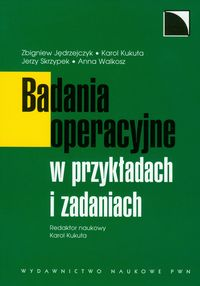

In [133]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Sekretarki", "PRACA: x1","PRACA: x2","PRACA: x3","PRACA: x4", "max Ilość pracy wykonywanej przez sekretarki"]
table.append_row(["Sekretarka_1", 420,    480,   240,  360, 1  ])
table.append_row(["Sekretarka_2", 480,    420,   300,  360, 1  ])
table.append_row(["Sekretarka_3", 420,    540,   300,  420, 1  ])
table.append_row(["Sekretarka_4", 360,    480,   360,  480, 1  ])
print(table)

+-------+-----------+-----------+-----------+-----------+----------------------+
| Sekre | PRACA: x1 | PRACA: x2 | PRACA: x3 | PRACA: x4 | max Ilość pracy wyko |
| tarki |           |           |           |           | nywanej przez sekret |
|       |           |           |           |           |         arki         |
+-------+-----------+-----------+-----------+-----------+----------------------+
| Sekre |    420    |    480    |    240    |    360    |          1           |
| tarka |           |           |           |           |                      |
|  _1   |           |           |           |           |                      |
+-------+-----------+-----------+-----------+-----------+----------------------+
| Sekre |    480    |    420    |    300    |    360    |          1           |
| tarka |           |           |           |           |                      |
|  _2   |           |           |           |           |                      |
+-------+-----------+-------

### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin
## KAŻDA SEKRETARKA MUSI DOSTAĆ JEDNĄ PRACĘ = 1, 

## KAŻDA PRACA MUSI BYĆ WYKONANA = 1

<span style="font-size: 120%;color:#0000ff"> KAŻDA SEKRETARKA MUSI DOSTAĆ TYLKO JEDNĄ PRACĘ = 1  </span> 

$
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 120%;color:#0000ff"> KAŻDA PRACA MUSI BYĆ WYKONANA = 1 </span>

$
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (5)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (6)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (7)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (8)\\
\end{align}
\right. 
$

In [134]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["SEKRETARKA:", "PRACA: x1","PRACA: x2","PRACA: x3","PRACA: x4", "Każda praca musi zostać wykonana"]
table.append_row(["SEKRETARKA_1", 420,    480,   240,  360, 1  ])
table.append_row(["SEKRETARKA_2", 480,    420,   300,  360, 1  ])
table.append_row(["SEKRETARKA_3", 420,    540,   300,  420, 1  ])
table.append_row(["SEKRETARKA_4", 360,    480,   360,  480, 1  ])
table.append_row(["max Ilość pracy wykonywanej przez sekretarki", 1,    1,   1,  1, 1  ])
print(table)

+-----------------+-----------+-----------+-----------+-----------+------------+
|   SEKRETARKA:   | PRACA: x1 | PRACA: x2 | PRACA: x3 | PRACA: x4 | Każda prac |
|                 |           |           |           |           | a musi zos |
|                 |           |           |           |           | tać wykona |
|                 |           |           |           |           |     na     |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_1   |    420    |    480    |    240    |    360    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_2   |    480    |    420    |    300    |    360    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_3   |    420    |    540    |    300    |    420    |     1      |
+-----------------+-----------+-----------+-----------+-----------+------------+
|  SEKRETARKA_4   |    360  

## Celem jest minimalizacja łącznego czasu pracy sekretarek

$ 
{
F(x_{i,j}) =420x_{11} + 480x_{12}+ 240x_{13}+ 360x_{14}\\+ 480x_{21}+420x_{22} + 300x_{23}+ 360x_{24}\\+ 420x_{31}+ 540x_{32}+300x_{33} + 420x_{34}+ 360x_{41}\\+ 480x_{42}+ 360x_{43}+480x_{44}   \to  min 
} 
$

In [135]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_22_STR_135",LpMinimize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [136]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")    
x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  

### Dodajemy do platformy funkcje celu

$ 
{
F(x_{i,j}) =420x_{11} + 480x_{12}+ 240x_{13}+ 360x_{14}\\+ 480x_{21}+420x_{22} + 300x_{23}+ 360x_{24}\\+ 420x_{31}+ 540x_{32}+300x_{33} + 420x_{34}+ 360x_{41}\\+ 480x_{42}+ 360x_{43}+480x_{44}   \to  min 
} 
$

In [137]:
# objective function
prob += 420*x11+480*x12+240*x13+360*x14+480*x21+420*x22+300*x23+360*x24+420*x31+540*x32+300*x33+420*x34+360*x41+480*x42+360*x43+480*x44, "Minimalizacja braków "

In [138]:
print(prob)

Przykład_22_STR_135:
MINIMIZE
420*x11 + 480*x12 + 240*x13 + 360*x14 + 480*x21 + 420*x22 + 300*x23 + 360*x24 + 420*x31 + 540*x32 + 300*x33 + 420*x34 + 360*x41 + 480*x42 + 360*x43 + 480*x44 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



span style="font-size: 120%;color:#0000ff"> KAŻDA SEKRETARKA MUSI DOSTAĆ TYLKO JEDNĄ PRACĘ = 1  </span> 

$
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 120%;color:#0000ff"> KAŻDA PRACA MUSI BYĆ WYKONANA = 1 </span>

$
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (5)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (6)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (7)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (8)\\
\end{align}
\right. 
$

In [139]:
# main constraints
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 + x23 + x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1

In [140]:
# main constraints
prob += x11 + x12 + x13+ x14  == 1
prob += x21 + x22 + x23+ x24  == 1
prob += x31 + x32 + x33+ x34  == 1
prob += x41 + x42 + x43+ x44  == 1

In [141]:
print(prob)

Przykład_22_STR_135:
MINIMIZE
420*x11 + 480*x12 + 240*x13 + 360*x14 + 480*x21 + 420*x22 + 300*x23 + 360*x24 + 420*x31 + 540*x32 + 300*x33 + 420*x34 + 360*x41 + 480*x42 + 360*x43 + 480*x44 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



In [142]:
print(prob)

Przykład_22_STR_135:
MINIMIZE
420*x11 + 480*x12 + 240*x13 + 360*x14 + 480*x21 + 420*x22 + 300*x23 + 360*x24 + 420*x31 + 540*x32 + 300*x33 + 420*x34 + 360*x41 + 480*x42 + 360*x43 + 480*x44 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [143]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [144]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 0
x13 = 0
x14 = 1
x21 = 0
x22 = 1
x23 = 0
x24 = 0
x31 = 0
x32 = 0
x33 = 1
x34 = 0
x41 = 1
x42 = 0
x43 = 0
x44 = 0


In [145]:
# maximum value of the objective function
print(f"min (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

min (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 1440


# <span style="color:blue"> Przyklad 23 STR. 138

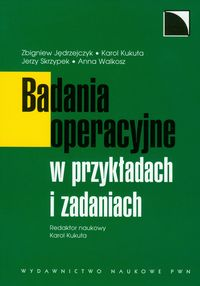

In [146]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Pracownicy:", "Kontrakt: x1","Kontrakt: x2","Kontrakt: x3","Kontrakt: x4", "max Ilość kontraktów na pracownika"]
table.append_row(["Pracownik A", 10,     7,    6,   8, 1  ])
table.append_row(["Pracownik B", 12,    14,   10,  17, 1  ])
table.append_row(["Pracownik C",  3,     5,    8,   4, 1  ])
table.append_row(["Ilość kontraktów=1",  1,     1,    1,   1, 1  ])
print(table)

+------------+---------+----------+---------+---------+------------------------+
| Pracownicy | Kontrak | Kontrakt | Kontrak | Kontrak | max Ilość kontraktów n |
|     :      |  t: x1  |   : x2   |  t: x3  |  t: x4  |      a pracownika      |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   10    |    7     |    6    |    8    |           1            |
|     A      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |   12    |    14    |   10    |   17    |           1            |
|     B      |         |          |         |         |                        |
+------------+---------+----------+---------+---------+------------------------+
| Pracownik  |    3    |    5     |    8    |    4    |           1            |
|     C      |         |          |         |         |                        |
+------------+---------+----

### Pierwsze ograniczenie: czas pracy maszyn nie może przekroczyć 180 godzin
## KAŻDA SEKRETARKA MUSI DOSTAĆ JEDNĄ PRACĘ = 1, 

## KAŻDA PRACA MUSI BYĆ WYKONANA = 1

# <span style="font-size: 120%;color:#0000ff"> KAŻDY EXPERT MUSI DOSTAĆ TYLKO JEDen KONTRAKT = 1  </span> 

$
\left\{
\begin{align} 
{10x_{11}+7x_{12}+6x_{13}+8x_{14}} & = 1 & (1)\\
{12x_{21}+14x_{22}+10x_{23}+17x_{24}} & = 1 & (2)\\
{3x_{31}+5x_{32}+8x_{33}+4x_{34}} & = 1 & (3)\\
\end{align}
\right. 
$

<span style="font-size: 120%;color:#0000ff"> KAŻDy KONTRAKT musi BYĆ WYKONANA = 1 </span>

$
\left\{
\begin{align} 
{10x_{11}+12x_{21}+3x_{31}} & = 1 & (5)\\
{7x_{12}+14x_{22}+5x_{32}} & = 1 & (6)\\
{6x_{13}+10x_{23}+8x_{33}} & = 1 & (7)\\
{8x_{11}+17x_{22}+4x_{33}} & = 1 & (8)\\
\end{align}
\right. 
$

In [147]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Pracownicy:", "Kontrakt: x1","Kontrakt: x2","Kontrakt: x3","Kontrakt: x4", "max Ilość kontraktów na pracownika"]
table.append_row(["Pracownik A", 10,     7,    6,   8, 1  ])
table.append_row(["Pracownik B", 12,    14,   10,  17, 1  ])
table.append_row(["Pracownik C",  3,     5,    8,   4, 1  ])
table.append_row(["Pracownik zewnętrzny",  0,  0,   0, 0, 1  ])
table.append_row(["Ilość kontraktów=1",  1,     1,    1,   1, 1  ])
print(table)

+-------------+---------+----------+---------+---------+-----------------------+
| Pracownicy: | Kontrak | Kontrakt | Kontrak | Kontrak | max Ilość kontraktów  |
|             |  t: x1  |   : x2   |  t: x3  |  t: x4  |     na pracownika     |
+-------------+---------+----------+---------+---------+-----------------------+
| Pracownik A |   10    |    7     |    6    |    8    |           1           |
+-------------+---------+----------+---------+---------+-----------------------+
| Pracownik B |   12    |    14    |   10    |   17    |           1           |
+-------------+---------+----------+---------+---------+-----------------------+
| Pracownik C |    3    |    5     |    8    |    4    |           1           |
+-------------+---------+----------+---------+---------+-----------------------+
| Pracownik z |    0    |    0     |    0    |    0    |           1           |
|  ewnętrzny  |         |          |         |         |                       |
+-------------+---------+---

# Celem jest maksymalizacja łącznego zysku z kontraktów

$ 
{
F(x_{i,j}) =10x_{11} + 7x_{12}+ 6x_{13}+ 8x_{14}\\+ 12x_{21}+14x_{22} + 10x_{23}+ 17x_{24}\\+ 3x_{31}+ 5x_{32}+8x_{33} + 4x_{34} +0x_{41}+0x_{42}+0x_{43}+0x_{44}  \to  max 
} 
$

In [148]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_23_STR_138",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [149]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")    
x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  

### Dodajemy do platformy funkcje celu

$ 
{
F(x_{i,j}) =10x_{11} + 7x_{12}+ 6x_{13}+ 8x_{14}\\+ 12x_{21}+14x_{22} + 10x_{23}+ 17x_{24}\\+ 3x_{31}+ 5x_{32}+8x_{33} + 4x_{34} +0x_{41}+0x_{42}+0x_{43}+0x_{44}  \to  max 
} 
$

In [150]:
# objective function
prob += 10*x11+7*x12+6*x13+8*x14+12*x21+14*x22+10*x23+17*x24+3*x31+5*x32+8*x33+4*x34+0*x41+0*x42+0*x43+0*x44, "Minimalizacja braków "

In [151]:
print(prob)

Przykład_23_STR_138:
MAXIMIZE
10*x11 + 7*x12 + 6*x13 + 8*x14 + 12*x21 + 14*x22 + 10*x23 + 17*x24 + 3*x31 + 5*x32 + 8*x33 + 4*x34 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer



span style="font-size: 120%;color:#0000ff"> KAŻDA SEKRETARKA MUSI DOSTAĆ TYLKO JEDNĄ PRACĘ = 1  </span> 

$
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 120%;color:#0000ff"> KAŻDA PRACA MUSI BYĆ WYKONANA = 1 </span>

$
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (5)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (6)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (7)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (8)\\
\end{align}
\right. 
$

In [152]:
# main constraints
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 + x23 + x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1

In [153]:
# main constraints
prob += x11 + x12 + x13+ x14  == 1
prob += x21 + x22 + x23+ x24  == 1
prob += x31 + x32 + x33+ x34  == 1
prob += x41 + x42 + x43+ x44  == 1

In [154]:
print(prob)

Przykład_23_STR_138:
MAXIMIZE
10*x11 + 7*x12 + 6*x13 + 8*x14 + 12*x21 + 14*x22 + 10*x23 + 17*x24 + 3*x31 + 5*x32 + 8*x33 + 4*x34 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



In [155]:
print(prob)

Przykład_23_STR_138:
MAXIMIZE
10*x11 + 7*x12 + 6*x13 + 8*x14 + 12*x21 + 14*x22 + 10*x23 + 17*x24 + 3*x31 + 5*x32 + 8*x33 + 4*x34 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [156]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [157]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 1
x12 = 0
x13 = 0
x14 = 0
x21 = 0
x22 = 0
x23 = 0
x24 = 1
x31 = 0
x32 = 0
x33 = 1
x34 = 0
x41 = 0
x42 = 1
x43 = 0
x44 = 0


In [158]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 35


# Zadanie 92 STR 144

In [159]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["oferty pracowników:", "Ford","Mercedes","Polonez"]
table.append_row(["Pracownik A", "19 tys. zł",    "35 tys. zł", "15 tys. zł"])
table.append_row(["Pracownik B", "21 tys. zł",    "39 tys. zł", "12 tys. zł"])
table.append_row(["Pracownik C", "18 tys. zł",    "40 tys. zł", "14 tys. zł"])
table.append_row(["Pracownik D", "20 tys. zł",    "26 tys. zł", "16 tys. zł"])
print(table)

+---------------------+------------+------------+------------+
| oferty pracowników: |    Ford    |  Mercedes  |  Polonez   |
+---------------------+------------+------------+------------+
|     Pracownik A     | 19 tys. zł | 35 tys. zł | 15 tys. zł |
+---------------------+------------+------------+------------+
|     Pracownik B     | 21 tys. zł | 39 tys. zł | 12 tys. zł |
+---------------------+------------+------------+------------+
|     Pracownik C     | 18 tys. zł | 40 tys. zł | 14 tys. zł |
+---------------------+------------+------------+------------+
|     Pracownik D     | 20 tys. zł | 26 tys. zł | 16 tys. zł |
+---------------------+------------+------------+------------+


<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - ktoś kupuje, zero ktoś nie kupuje. Pronlrm jest, że czterech gości chce kupić samochody a samochodów jest 3 więc powinnismy utworzyc jeden samochód fantomowy (sztuczny). Jego wybór bedzie ioznaczał że ktoś nie kupił samochodu.


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

ceny samochodów

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy pracownik ma kupić maksymalnie 1 samochód!
Pracownik nie może kupić ujemną liczbę samochodów.

TWORZONY JEST JEDEN WIĘCEJ SAMOCHÓD FANTOMOWY

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & \leqslant 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & \leqslant 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & \leqslant 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & \leqslant 1 & (4)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & \geqslant 0 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & \geqslant 0 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & \geqslant 0 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & \geqslant 0 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy samochód może być sprzedany tylko raz </span>

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (6)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (7)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (8)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (9)\\
\end{align}
\right. 
$



<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować przychody ze sprtzedaży samochodów.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})=19*x_{11}+35*x_{12}+15*x_{13}+0*x_{14}\\+21*x_{21}+39*x_{22}+12*x_{23}+0*x_{24}\\+18*x_{31}+40*x_{32}+14*x_{33}+x_{34}+20\\*x_{41}+26*x_{42}+16*x_{43}+0*x_{44}  \to  max
\qquad 
} $

In [160]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_92_STR_144",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [161]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer")
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")    
x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  

### Dodajemy do platformy funkcje celu

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\=19*x_{11}+35*x_{12}+15*x_{13}+0*x_{14}\\+21*x_{21}+39*x_{22}+12*x_{23}+0*x_{24}\\+18*x_{31}+40*x_{32}+14*x_{33}+0*x_{34}\\+20*x_{41}+26*x_{42}+16*x_{43}+0*x_{44}  \to  max
\qquad 
} $

In [162]:
# objective function
prob += 19*x11+35*x12+15*x13+0*x14+21*x21+39*x22+12*x23+0*x24+18*x31+40*x32+14*x33+0*x34+20*x41+26*x42+16*x43+0*x44, "Minimalizacja braków "

In [163]:
print(prob)

Przykład_92_STR_144:
MAXIMIZE
19*x11 + 35*x12 + 15*x13 + 21*x21 + 39*x22 + 12*x23 + 18*x31 + 40*x32 + 14*x33 + 20*x41 + 26*x42 + 16*x43 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer




zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy pracownik ma kupić maksymalnie 1 samochód!
Pracownik nie może kupić ujemną liczbę samochodów.

TWORZONY JEST JEDEN WIĘCEJ SAMOCHÓD FANTOMOWY

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & \leqslant 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & \leqslant 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & \leqslant 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & \leqslant 1 & (4)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & \geqslant 0 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & \geqslant 0 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & \geqslant 0 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & \geqslant 0 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy samochód może być sprzedany tylko raz </span>

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (6)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (7)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (8)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (9)\\
\end{align}
\right. 
$



In [164]:
# OGRANICZENIA DLA SAMOCHODÓW (CZWARTA KOLUMNA TO SAMOCHÓD FANTOMOWY)
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 + x23 + x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1

In [165]:
# OGRANICZENIA DLA PRACOWNIKÓW (CZWARTA KOLUMNA TO SAMOCHÓD FANTOMOWY)
prob += x11 + x12 + x13 + x14 == 1  # PRACOWNIK A
prob += x21 + x22 + x23 + x24 == 1  # PRACOWNIK B
prob += x31 + x32 + x33 + x34 == 1  # PRACOWNIK C
prob += x41 + x42 + x43 + x44 == 1  # PRACOWNIK D

In [166]:
print(prob)

Przykład_92_STR_144:
MAXIMIZE
19*x11 + 35*x12 + 15*x13 + 21*x21 + 39*x22 + 12*x23 + 18*x31 + 40*x32 + 14*x33 + 20*x41 + 26*x42 + 16*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



In [167]:
print(prob)

Przykład_92_STR_144:
MAXIMIZE
19*x11 + 35*x12 + 15*x13 + 21*x21 + 39*x22 + 12*x23 + 18*x31 + 40*x32 + 14*x33 + 20*x41 + 26*x42 + 16*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [168]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [169]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 0
x13 = 0
x14 = 1
x21 = 1
x22 = 0
x23 = 0
x24 = 0
x31 = 0
x32 = 1
x33 = 0
x34 = 0
x41 = 0
x42 = 0
x43 = 1
x44 = 0


In [170]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 77


- Pracownik A kupił samochód za 0 tys. zł (brak zakupu)
- Pracownik B kupił samochód za 21 tys. zł (Ford)
- Pracownik C kupił samochód za 40 tys. zł (Mercedes)
- Pracownik D kupił samochód za 16 tys. zł (Polonez)

In [171]:
21+40+16

77

# Zadanie 93 STR 145

In [172]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszynistka:", "Angielski","Niemiecki","Włoski"]
table.append_row(["Maszynistka A",  80,  105, 79])
table.append_row(["Maszynistka B", 109,  "x", 90])
table.append_row(["Maszynistka C", 109,   97, "x"])
table.append_row(["Maszynistka D",  95,   80, 85])
print(table)

+---------------+-----------+-----------+--------+
| Maszynistka:  | Angielski | Niemiecki | Włoski |
+---------------+-----------+-----------+--------+
| Maszynistka A |    80     |    105    |   79   |
+---------------+-----------+-----------+--------+
| Maszynistka B |    109    |     x     |   90   |
+---------------+-----------+-----------+--------+
| Maszynistka C |    109    |    97     |   x    |
+---------------+-----------+-----------+--------+
| Maszynistka D |    95     |    80     |   85   |
+---------------+-----------+-----------+--------+



# <span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - ktoś dostaje przydział, 
zero ktoś nie dostaje przydziału do tej konkretnej roboty. 
Ponadto są czetry maszynistki.Jedna nie dostanie przydziału do pracy - trzeba utworzyć pracę fantomową.


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

Szybkość pisanych slów na minutę - to kryterium jakości kwalifikacji, czym, więcej tym lepiej.

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy pracownik ma dostać jedną pracę!
Pracownik nie może dostać ujemnej liczby prac.

TWORZONA JEST JEDNA WIĘCEJ PRACA FANTOMOWA

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 \\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 \\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 \\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 \\
\end{align}
\right. 
$


<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować efektywność pracy.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\=80x_{11}+105x_{12}+79x_{13}+0x_{14}\\+109x_{21}+90x_{23}+0x_{24}\\+100x_{31}+97x_{32}+0x_{34}\\+95x_{41}+80x_{42}+85x_{43}+0x_{44}  \to  max
\qquad 
} $

In [173]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_93_STR_144",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{41}} & \geqslant 0 & (5)\\
{x_{42}} & \geqslant 0 & (5)\\
{x_{43}} & \geqslant 0 & (5)\\
{x_{44}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [174]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer") 
x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  

### Dodajemy do platformy funkcje celu

$
{
\\
F(x_{i,j})\\=80x_{11}+105x_{12}+79x_{13}+0x_{14}\\+109x_{21}+90x_{23}+0x_{24}\\+100x_{31}+97x_{32}+0x_{34}\\+95x_{41}+80x_{42}+85x_{43}+0x_{44}  \to  max
\qquad 
} $

In [175]:
# objective function
prob += 80*x11+105*x12+79*x13+0*x14+109*x21+90*x23+0*x24+100*x31+97*x32+0*x34+95*x41+80*x42+85*x43+0*x44, "Minimalizacja braków "

In [176]:
print(prob)

Przykład_93_STR_144:
MAXIMIZE
80*x11 + 105*x12 + 79*x13 + 109*x21 + 90*x23 + 100*x31 + 97*x32 + 95*x41 + 80*x42 + 85*x43 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x21 Integer
0 <= x23 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer




zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy pracownik ma kupić maksymalnie 1 samochód!
Pracownik nie może kupić ujemną liczbę samochodów.

TWORZONY JEST JEDEN WIĘCEJ SAMOCHÓD FANTOMOWY

TWORZONA JEST JEDNA WIĘCEJ PRACA FANTOMOWA

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 \\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 \\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 \\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 \\
\end{align}
\right. 
$


In [177]:
# OGRANICZENIA DLA SAMOCHODÓW (CZWARTA KOLUMNA TO SAMOCHÓD FANTOMOWY)
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 + x23 + x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1

In [178]:
# OGRANICZENIA DLA PRACOWNIKÓW (CZWARTA KOLUMNA TO SAMOCHÓD FANTOMOWY)
prob += x11 + x12 + x13 + x14 == 1  # PRACOWNIK A
prob += x21 + x22 + x23 + x24 == 1  # PRACOWNIK B
prob += x31 + x32 + x33 + x34 == 1  # PRACOWNIK C
prob += x41 + x42 + x43 + x44 == 1  # PRACOWNIK D

In [179]:
print(prob)

Przykład_93_STR_144:
MAXIMIZE
80*x11 + 105*x12 + 79*x13 + 109*x21 + 90*x23 + 100*x31 + 97*x32 + 95*x41 + 80*x42 + 85*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



In [180]:
print(prob)

Przykład_93_STR_144:
MAXIMIZE
80*x11 + 105*x12 + 79*x13 + 109*x21 + 90*x23 + 100*x31 + 97*x32 + 95*x41 + 80*x42 + 85*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [181]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [182]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 1
x13 = 0
x14 = 0
x21 = 1
x22 = 0
x23 = 0
x24 = 0
x31 = 0
x32 = 0
x33 = 0
x34 = 1
x41 = 0
x42 = 0
x43 = 1
x44 = 0


In [183]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 299


# Zadanie 94 STR 145

In [2]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Technicy:", "Projekt 1","Projekt 2","Projekt 3", "Projekt 4", "Projekt 5", " Brak projektu"]
table.append_row(["Tech_A", 180,  160, 240, 300, 300, 0])
table.append_row(["Tech_B", 190,  150, 250, 320, 170, 0])
table.append_row(["Tech_C", 150,  170, 230, 340, 140, 0])
table.append_row(["Tech_D", 170,  200, 210, 310, 190, 0])
table.append_row(["Tech_E", 220,  190, 260, 330, 160, 0])
table.append_row(["Tech_F", 190,  180, 300, 310, 210, 0])
print(table)

+----------+------------+---------+---------+---------+---------+--------------+
| Technicy | Projekt 1  | Projekt | Projekt | Projekt | Projekt |  Brak projek |
|    :     |            |    2    |    3    |    4    |    5    |      tu      |
+----------+------------+---------+---------+---------+---------+--------------+
|  Tech_A  |    180     |   160   |   240   |   300   |   300   |      0       |
+----------+------------+---------+---------+---------+---------+--------------+
|  Tech_B  |    190     |   150   |   250   |   320   |   170   |      0       |
+----------+------------+---------+---------+---------+---------+--------------+
|  Tech_C  |    150     |   170   |   230   |   340   |   140   |      0       |
+----------+------------+---------+---------+---------+---------+--------------+
|  Tech_D  |    170     |   200   |   210   |   310   |   190   |      0       |
+----------+------------+---------+---------+---------+---------+--------------+
|  Tech_E  |    220     |   


<span style="font-size: 180%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - ktoś dostaje przydział, 
zero ktoś nie dostaje przydziału do tej konkretnej roboty. 
Ponadto jest sześciu techników.Jedna nie dostanie przydziału do pracy - trzeba utworzyć pracę fantomową.


<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

Czas naprawy poszczególnych techników w poszczególnych projektach.

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy pracownik ma dostać jedną pracę!
Pracownik nie może dostać ujemnej liczby prac ani więcej niż jednej pracy.

TWORZONA JEST JEDNA WIĘCEJ PRACA FANTOMOWA
KAŻDY TECHNIK MA DOSTAĆ JEDNĄ PRACĘ
#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}+x_{16}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{25}+x_{26}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}+x_{36}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}+x_{46}} & = 1 & (4)\\
{x_{51}+x_{52}+x_{53}+x_{54}+x_{55}+x_{56}} & = 1 & (4)\\
{x_{61}+x_{62}+x_{63}+x_{64}+x_{65}+x_{66}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy projekt może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}+x_{51}+x_{61}} & = 1 \\
{x_{12}+x_{22}+x_{32}+x_{42}+x_{52}+x_{62}} & = 1 \\
{x_{13}+x_{23}+x_{33}+x_{43}+x_{53}+x_{63}} & = 1 \\
{x_{14}+x_{24}+x_{34}+x_{44}+x_{54}+x_{64}} & = 1 \\
{x_{15}+x_{25}+x_{35}+x_{45}+x_{55}+x_{65}} & = 1 \\
{x_{16}+x_{26}+x_{36}+x_{46}+x_{56}+x_{66}} & = 1 \\
\end{align}
\right. 
$


<span style="font-size: 150%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zminimalizować łączny czas wykonania napraw

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\=180x_{11}+160x_{12}+240x_{13}+300x_{14}+300x_{15}+0x_{16}\\+190x_{21}+150x_{22}+250x_{23}+320x_{24}+170x_{25}+0x_{26}\\
+150x_{31}+170x_{32}+230x_{33}+340x_{34}+140x_{35}+0x_{35}\\
+170x_{41}+200x_{42}+210x_{43}+310x_{44}+190x_{45}+0x_{46}\\
+220x_{51}+190x_{52}+260x_{53}+330x_{54}+160x_{55}+0x_{56}\\
+190x_{61}+180x_{62}+300x_{63}+310x_{64}+210x_{65}+0x_{66}\\
\to  min
\qquad 
} $

In [21]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_94_STR_144",LpMinimize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{16}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{26}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
{x_{36}} & \geqslant 0 & (5)\\
{x_{41}} & \geqslant 0 & (5)\\
{x_{42}} & \geqslant 0 & (5)\\
{x_{43}} & \geqslant 0 & (5)\\
{x_{44}} & \geqslant 0 & (5)\\
{x_{45}} & \geqslant 0 & (5)\\
{x_{46}} & \geqslant 0 & (5)\\
{x_{51}} & \geqslant 0 & (5)\\
{x_{52}} & \geqslant 0 & (5)\\
{x_{53}} & \geqslant 0 & (5)\\
{x_{54}} & \geqslant 0 & (5)\\
{x_{55}} & \geqslant 0 & (5)\\
{x_{56}} & \geqslant 0 & (5)\\
{x_{61}} & \geqslant 0 & (5)\\
{x_{62}} & \geqslant 0 & (5)\\
{x_{63}} & \geqslant 0 & (5)\\
{x_{64}} & \geqslant 0 & (5)\\
{x_{65}} & \geqslant 0 & (5)\\
{x_{66}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [22]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x16=LpVariable("x16",lowBound=0,upBound=None, cat="Integer")

x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x26=LpVariable("x26",lowBound=0,upBound=None, cat="Integer")

x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer") 
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")
x36=LpVariable("x36",lowBound=0,upBound=None, cat="Integer") 

x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  
x46=LpVariable("x46",lowBound=0,upBound=None, cat="Integer")  

x51=LpVariable("x51",lowBound=0,upBound=None, cat="Integer")  
x52=LpVariable("x52",lowBound=0,upBound=None, cat="Integer")  
x53=LpVariable("x53",lowBound=0,upBound=None, cat="Integer")  
x54=LpVariable("x54",lowBound=0,upBound=None, cat="Integer")  
x55=LpVariable("x55",lowBound=0,upBound=None, cat="Integer")  
x56=LpVariable("x56",lowBound=0,upBound=None, cat="Integer") 

x61=LpVariable("x61",lowBound=0,upBound=None, cat="Integer")  
x62=LpVariable("x62",lowBound=0,upBound=None, cat="Integer")  
x63=LpVariable("x63",lowBound=0,upBound=None, cat="Integer")  
x64=LpVariable("x64",lowBound=0,upBound=None, cat="Integer")  
x65=LpVariable("x65",lowBound=0,upBound=None, cat="Integer")  
x66=LpVariable("x66",lowBound=0,upBound=None, cat="Integer") 

Zminimalizować łączny czas wykonania napraw

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\=180x_{11}+160x_{12}+240x_{13}+300x_{14}+300x_{15}+0x_{16}\\+190x_{21}+150x_{22}+250x_{23}+320x_{24}+170x_{25}+0x_{26}\\
+150x_{31}+170x_{32}+230x_{33}+340x_{34}+140x_{35}+0x_{35}\\
+170x_{41}+200x_{42}+210x_{43}+310x_{44}+190x_{45}+0x_{46}\\
+220x_{51}+190x_{52}+260x_{53}+330x_{54}+160x_{55}+0x_{56}\\
+190x_{61}+180x_{62}+300x_{63}+310x_{64}+210x_{65}+0x_{66}\\
\to  min
\qquad 
} $

In [23]:
# objective function
prob += 180*x11+160*x12+240*x13+300*x14+300*x15+0*x16+190*x21+150*x22+250*x23+320*x24+170*x25+0*x26+150*x31+170*x32+230*x33+340*x34+140*x35+0*x36+170*x41+200*x42+210*x43+310*x44+190*x45+0*x45+220*x51+190*x52+260*x53+330*x54+160*x55+0*x56+190*x61+180*x62+300*x63+310*x64+210*x65+0*x66, "Minimalizacja braków "

In [24]:
print(prob)

Przykład_94_STR_144:
MINIMIZE
180*x11 + 160*x12 + 240*x13 + 300*x14 + 300*x15 + 190*x21 + 150*x22 + 250*x23 + 320*x24 + 170*x25 + 150*x31 + 170*x32 + 230*x33 + 340*x34 + 140*x35 + 170*x41 + 200*x42 + 210*x43 + 310*x44 + 190*x45 + 220*x51 + 190*x52 + 260*x53 + 330*x54 + 160*x55 + 190*x61 + 180*x62 + 300*x63 + 310*x64 + 210*x65 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer
0 <= x51 Integer
0 <= x52 Integer
0 <= x53 Integer
0 <= x54 Integer
0 <= x55 Integer
0 <= x61 Integer
0 <= x62 Integer
0 <= x63 Integer
0 <= x64 Integer
0 <= x65 Integer



TWORZONA JEST JEDNA WIĘCEJ PRACA FANTOMOWA
KAŻDY TECHNIK MA DOSTAĆ JEDNĄ PRACĘ
#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}+x_{16}} & = 1 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{25}+x_{26}} & = 1 & (2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}+x_{36}} & = 1 & (3)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}+x_{46}} & = 1 & (4)\\
{x_{51}+x_{52}+x_{53}+x_{54}+x_{55}+x_{56}} & = 1 & (4)\\
{x_{61}+x_{62}+x_{63}+x_{64}+x_{65}+x_{66}} & = 1 & (4)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy projekt może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}+x_{51}+x_{61}} & = 1 \\
{x_{12}+x_{22}+x_{32}+x_{42}+x_{52}+x_{62}} & = 1 \\
{x_{13}+x_{23}+x_{33}+x_{43}+x_{53}+x_{63}} & = 1 \\
{x_{14}+x_{24}+x_{34}+x_{44}+x_{54}+x_{64}} & = 1 \\
{x_{15}+x_{25}+x_{35}+x_{45}+x_{55}+x_{65}} & = 1 \\
{x_{16}+x_{26}+x_{36}+x_{46}+x_{56}+x_{66}} & = 1 \\
\end{align}
\right. 
$

In [25]:
# OGRANICZENIA DLA PROJEKTÓW (CZWARTA KOLUMNA TO PROJEKT FANTOMOWY)
prob += x11 + x21 + x31+ x41+ x51+ x61  == 1  # USZKODZENIA 1
prob += x12 + x22 + x32+ x42+ x52+ x62  == 1  # USZKODZENIA 2
prob += x13 + x23 + x33+ x43+ x53+ x63  == 1  # USZKODZENIA 3
prob += x14 + x24 + x34+ x44+ x54+ x64  == 1  # USZKODZENIA 4
prob += x15 + x25 + x35+ x45+ x55+ x65  == 1  # USZKODZENIA 5
prob += x16 + x26 + x36+ x46+ x56+ x66  == 1  # USZKODZENIA 6

In [26]:
# OGRANICZENIA DLA PRACOWNIKÓW (CZWARTA KOLUMNA TO SAMOCHÓD FANTOMOWY)
prob += x11 + x12 + x13 + x14+ x15+ x16 == 1 #PRACOWNIK A
prob += x21 + x22 + x23 + x24+ x25+ x26 == 1  # PRACOWNIK B
prob += x31 + x32 + x33 + x34+ x35+ x36 == 1  # PRACOWNIK C
prob += x41 + x42 + x43 + x44+ x45+ x46 == 1  # PRACOWNIK D
prob += x51 + x52 + x53 + x54+ x55+ x56 == 1  # PRACOWNIK D
prob += x61 + x62 + x63 + x64+ x65+ x66 == 1  # PRACOWNIK D

In [27]:
print(prob)

Przykład_94_STR_144:
MINIMIZE
180*x11 + 160*x12 + 240*x13 + 300*x14 + 300*x15 + 190*x21 + 150*x22 + 250*x23 + 320*x24 + 170*x25 + 150*x31 + 170*x32 + 230*x33 + 340*x34 + 140*x35 + 170*x41 + 200*x42 + 210*x43 + 310*x44 + 190*x45 + 220*x51 + 190*x52 + 260*x53 + 330*x54 + 160*x55 + 190*x61 + 180*x62 + 300*x63 + 310*x64 + 210*x65 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 + x51 + x61 = 1

_C2: x12 + x22 + x32 + x42 + x52 + x62 = 1

_C3: x13 + x23 + x33 + x43 + x53 + x63 = 1

_C4: x14 + x24 + x34 + x44 + x54 + x64 = 1

_C5: x15 + x25 + x35 + x45 + x55 + x65 = 1

_C6: x16 + x26 + x36 + x46 + x56 + x66 = 1

_C7: x11 + x12 + x13 + x14 + x15 + x16 = 1

_C8: x21 + x22 + x23 + x24 + x25 + x26 = 1

_C9: x31 + x32 + x33 + x34 + x35 + x36 = 1

_C10: x41 + x42 + x43 + x44 + x45 + x46 = 1

_C11: x51 + x52 + x53 + x54 + x55 + x56 = 1

_C12: x61 + x62 + x63 + x64 + x65 + x66 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x16 Integer
0 <= x21 Integ

In [17]:
print(prob)

Przykład_94_STR_144:
MAXIMIZE
180*x11 + 160*x12 + 240*x13 + 300*x14 + 300*x15 + 190*x21 + 150*x22 + 250*x23 + 320*x24 + 170*x25 + 150*x31 + 170*x32 + 230*x33 + 340*x34 + 140*x35 + 170*x41 + 200*x42 + 210*x43 + 310*x44 + 190*x45 + 220*x51 + 190*x52 + 260*x53 + 330*x54 + 160*x55 + 190*x61 + 180*x62 + 300*x63 + 310*x64 + 210*x65 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 + x51 + x61 = 1

_C2: x12 + x22 + x32 + x42 + x52 + x62 = 1

_C3: x13 + x23 + x33 + x43 + x53 + x63 = 1

_C4: x14 + x24 + x34 + x44 + x54 + x64 = 1

_C5: x15 + x25 + x35 + x45 + x55 + x65 = 1

_C6: x16 + x26 + x36 + x46 + x56 + x66 = 1

_C7: x11 + x12 + x13 + x14 + x15 + x16 = 1

_C8: x21 + x22 + x23 + x24 + x25 + x26 = 1

_C9: x31 + x32 + x33 + x34 + x35 + x36 = 1

_C10: x41 + x42 + x43 + x44 + x45 + x46 = 1

_C11: x51 + x52 + x53 + x54 + x55 + x56 = 1

_C12: x61 + x62 + x63 + x64 + x65 + x66 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x16 Integer
0 <= x21 Integ

### Rozwiązanie problemu

In [28]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [29]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 0
x13 = 0
x14 = 1
x15 = 0
x16 = 0
x21 = 0
x22 = 1
x23 = 0
x24 = 0
x25 = 0
x26 = 0
x31 = 1
x32 = 0
x33 = 0
x34 = 0
x35 = 0
x36 = 0
x41 = 0
x42 = 0
x43 = 1
x44 = 0
x45 = 0
x46 = 0
x51 = 0
x52 = 0
x53 = 0
x54 = 0
x55 = 1
x56 = 0
x61 = 0
x62 = 0
x63 = 0
x64 = 0
x65 = 0
x66 = 1


In [30]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 970


Minimalny czas wykonania zadania to 970 minut

<span style="font-size: 150%;color:white;background:#1155cc"> Zadanie 95 STR 145

In [31]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszynistka:", "produkt_1","produkt_2","produkt_3","produkt_4","produkt_5"]
table.append_row(["Zakład 1", 4,  3, 7, 12, 3])
table.append_row(["Zakład 2", 2,  5, 8,  1, 9])
table.append_row(["Zakład 3", 6,  4, 8,  8, 6])
table.append_row(["Zakład 4", 3,  2, 4,  5, 6])
table.append_row(["Zakład 5", 7,  9, 3,  2, 5])
print(table)

+--------------+-----------+-----------+-----------+-----------+-----------+
| Maszynistka: | produkt_1 | produkt_2 | produkt_3 | produkt_4 | produkt_5 |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 1   |     4     |     3     |     7     |    12     |     3     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 2   |     2     |     5     |     8     |     1     |     9     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 3   |     6     |     4     |     8     |     8     |     6     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 4   |     3     |     2     |     4     |     5     |     6     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 5   |     7     |     9     |     3     |     2     |     5     |
+--------------+-----------+-----------+-----------+-----------+-----------+


<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - ktoś dostaje przydział, 
zero ktoś nie dostaje przydziału do tej konkretnej roboty. 

<span style="font-size: 130%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

ilość set sztuk produkcji na minutę - to kryterium wydajności, czym, więcej tym lepiej.

<span style="font-size: 130%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy zakład ma produkować tylko jeden produkt!
Specjalizacja zakładów.
jest równa ilość produktów (5) i zakładów (5) więc każdy zakład będzie produkował tylko jeden rodzaj produktu.
Nie trzeba robić produktu fantomowego.

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & = 1 & (zakład 1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{35}} & = 1 & (zakład 2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}} & = 1 & (zakład 3)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}} & = 1 & (zakład 4)\\
{x_{51}+x_{52}+x_{53}+x_{54}+x_{55}} & = 1 & (zakład 5)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}+x_{51}} & = 1 & (produkt 1)\\
{x_{12}+x_{22}+x_{32}+x_{42}+x_{52}} & = 1 & (produkt 2)\\
{x_{13}+x_{23}+x_{33}+x_{43}+x_{53}} & = 1 & (produkt 3)\\
{x_{14}+x_{24}+x_{34}+x_{44}+x_{54}} & = 1 & (produkt 4)\\
{x_{15}+x_{25}+x_{35}+x_{45}+x_{55}} & = 1 & (produkt 5)\\
\end{align}
\right. 
$


<span style="font-size: 130%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować efektywność pracy.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\
=4x_{11}+3x_{12}+7x_{13}+12x_{14}+3x_{15}\\
+2x_{21}+5x_{23}+8x_{24}+ 1x_{24}+9x_{25}\\
+6x_{31}+4x_{32}+8x_{33}+ 8x_{34}+6x_{35}\\
+3x_{41}+2x_{42}+4x_{43}+ 5x_{44}+6x_{45}\\
+7x_{41}+9x_{42}+3x_{43}+ 2x_{44}+5x_{45}\\
\to  max
\qquad 
} $

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [33]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_95_STR_145",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{16}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{26}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
{x_{36}} & \geqslant 0 & (5)\\
{x_{41}} & \geqslant 0 & (5)\\
{x_{42}} & \geqslant 0 & (5)\\
{x_{43}} & \geqslant 0 & (5)\\
{x_{44}} & \geqslant 0 & (5)\\
{x_{45}} & \geqslant 0 & (5)\\
{x_{46}} & \geqslant 0 & (5)\\
{x_{51}} & \geqslant 0 & (5)\\
{x_{52}} & \geqslant 0 & (5)\\
{x_{53}} & \geqslant 0 & (5)\\
{x_{54}} & \geqslant 0 & (5)\\
{x_{55}} & \geqslant 0 & (5)\\
{x_{56}} & \geqslant 0 & (5)\\
{x_{61}} & \geqslant 0 & (5)\\
{x_{62}} & \geqslant 0 & (5)\\
{x_{63}} & \geqslant 0 & (5)\\
{x_{64}} & \geqslant 0 & (5)\\
{x_{65}} & \geqslant 0 & (5)\\
{x_{66}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [ ]:
<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania

In [34]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x16=LpVariable("x16",lowBound=0,upBound=None, cat="Integer")

x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x26=LpVariable("x26",lowBound=0,upBound=None, cat="Integer")

x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer") 
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")
x36=LpVariable("x36",lowBound=0,upBound=None, cat="Integer") 

x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  
x46=LpVariable("x46",lowBound=0,upBound=None, cat="Integer")  

x51=LpVariable("x51",lowBound=0,upBound=None, cat="Integer")  
x52=LpVariable("x52",lowBound=0,upBound=None, cat="Integer")  
x53=LpVariable("x53",lowBound=0,upBound=None, cat="Integer")  
x54=LpVariable("x54",lowBound=0,upBound=None, cat="Integer")  
x55=LpVariable("x55",lowBound=0,upBound=None, cat="Integer")  
x56=LpVariable("x56",lowBound=0,upBound=None, cat="Integer") 

x61=LpVariable("x61",lowBound=0,upBound=None, cat="Integer")  
x62=LpVariable("x62",lowBound=0,upBound=None, cat="Integer")  
x63=LpVariable("x63",lowBound=0,upBound=None, cat="Integer")  
x64=LpVariable("x64",lowBound=0,upBound=None, cat="Integer")  
x65=LpVariable("x65",lowBound=0,upBound=None, cat="Integer")  
x66=LpVariable("x66",lowBound=0,upBound=None, cat="Integer") 

### Dodajemy do platformy funkcje celu

Zmaksymalizować efektywność pracy.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\
=4x_{11}+3x_{12}+7x_{13}+12x_{14}+3x_{15}\\
+2x_{21}+5x_{22}+8x_{23}+ 1x_{24}+9x_{25}\\
+6x_{31}+4x_{32}+8x_{33}+ 8x_{34}+6x_{35}\\
+3x_{41}+2x_{42}+4x_{43}+ 5x_{44}+6x_{45}\\
+7x_{51}+9x_{52}+3x_{53}+ 2x_{54}+5x_{55}\\
\to  max
\qquad 
} $

In [35]:
# objective function
prob +=4*x11+3*x12+7*x13+12*x14+3*x15+2*x21+5*x22+8*x23+1*x24+9*x25+6*x31+4*x32+8*x33+8*x34+6*x35+3*x41+2*x42+4*x43+5*x44+6*x45+7*x51+9*x52+3*x53+2*x54+5*x55, "maksymalizacja wydajności produkcji "

In [36]:
print(prob)

Przykład_95_STR_145:
MAXIMIZE
4*x11 + 3*x12 + 7*x13 + 12*x14 + 3*x15 + 2*x21 + 5*x22 + 8*x23 + 1*x24 + 9*x25 + 6*x31 + 4*x32 + 8*x33 + 8*x34 + 6*x35 + 3*x41 + 2*x42 + 4*x43 + 5*x44 + 6*x45 + 7*x51 + 9*x52 + 3*x53 + 2*x54 + 5*x55 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer
0 <= x51 Integer
0 <= x52 Integer
0 <= x53 Integer
0 <= x54 Integer
0 <= x55 Integer



#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & = 1 & (zakład 1)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{35}} & = 1 & (zakład 2)\\
{x_{31}+x_{32}+x_{33}+x_{34}+x_{35}} & = 1 & (zakład 3)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}} & = 1 & (zakład 4)\\
{x_{51}+x_{52}+x_{53}+x_{54}+x_{55}} & = 1 & (zakład 5)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}+x_{51}} & = 1 & (produkt 1)\\
{x_{12}+x_{22}+x_{32}+x_{42}+x_{52}} & = 1 & (produkt 2)\\
{x_{13}+x_{23}+x_{33}+x_{43}+x_{53}} & = 1 & (produkt 3)\\
{x_{14}+x_{24}+x_{34}+x_{44}+x_{54}} & = 1 & (produkt 4)\\
{x_{15}+x_{25}+x_{35}+x_{45}+x_{55}} & = 1 & (produkt 5)\\
\end{align}
\right. 
$


In [37]:
# OGRANICZENIA DLA ZAKŁADÓW 
prob += x11 + x21 + x31+ x41+ x51  == 1
prob += x12 + x22 + x32+ x42+ x52  == 1
prob += x13 + x23 + x33+ x43+ x53  == 1
prob += x14 + x24 + x34+ x44+ x54  == 1
prob += x15 + x25 + x35+ x45+ x55  == 1

In [38]:
# OGRANICZENIA DLA PRODUKTÓW
prob += x11 + x12 + x13 + x14+ x15 == 1  # PRODUKT A
prob += x21 + x22 + x23 + x24+ x25 == 1  # PRODUKT B
prob += x31 + x32 + x33 + x34+ x35 == 1  # PRODUKT C
prob += x41 + x42 + x43 + x44+ x45 == 1  # PRODUKT D
prob += x51 + x52 + x53 + x54+ x55 == 1  # PRODUKT D

In [39]:
print(prob)

Przykład_95_STR_145:
MAXIMIZE
4*x11 + 3*x12 + 7*x13 + 12*x14 + 3*x15 + 2*x21 + 5*x22 + 8*x23 + 1*x24 + 9*x25 + 6*x31 + 4*x32 + 8*x33 + 8*x34 + 6*x35 + 3*x41 + 2*x42 + 4*x43 + 5*x44 + 6*x45 + 7*x51 + 9*x52 + 3*x53 + 2*x54 + 5*x55 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 + x51 = 1

_C2: x12 + x22 + x32 + x42 + x52 = 1

_C3: x13 + x23 + x33 + x43 + x53 = 1

_C4: x14 + x24 + x34 + x44 + x54 = 1

_C5: x15 + x25 + x35 + x45 + x55 = 1

_C6: x11 + x12 + x13 + x14 + x15 = 1

_C7: x21 + x22 + x23 + x24 + x25 = 1

_C8: x31 + x32 + x33 + x34 + x35 = 1

_C9: x41 + x42 + x43 + x44 + x45 = 1

_C10: x51 + x52 + x53 + x54 + x55 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer
0 <= x51 Integer
0 <= x52

In [180]:
print(prob)

Przykład_93_STR_144:
MAXIMIZE
80*x11 + 105*x12 + 79*x13 + 109*x21 + 90*x23 + 100*x31 + 97*x32 + 95*x41 + 80*x42 + 85*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [40]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [41]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 0
x13 = 0
x14 = 1
x15 = 0
x21 = 0
x22 = 0
x23 = 0
x24 = 0
x25 = 1
x31 = 0
x32 = 0
x33 = 1
x34 = 0
x35 = 0
x41 = 1
x42 = 0
x43 = 0
x44 = 0
x45 = 0
x51 = 0
x52 = 1
x53 = 0
x54 = 0
x55 = 0


In [42]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 41


<span style="font-size: 130%;color:#0000ff">MAKSYMAKLIZACJA WYDAJNOŚCI TO 41 TYS. SZTUK WYROBÓW NA MINUTĘ

<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania

In [43]:
from pulp import *

# Tworze listę zakładów
Warehouses = ["Zakład 1","Zakład 2","Zakład 3","Zakład 4","Zakład 5"]

# Tworze słownik ile każdy zakład może maksymalnie produkować detali
supply = {"Zakład 1": 1,
          "Zakład 2": 1,
          "Zakład 3": 1,
          "Zakład 4": 1,
          "Zakład 5": 1
         }

In [44]:
# Tworzę listę produktów
Bars = ["produkt_1", "produkt_2", "produkt_3","produkt_4","produkt_5"]

# dokładna ilość detali do produkcji
demand = {"produkt_1": 1,
        "produkt_2": 1,
        "produkt_3": 1,
        "produkt_4": 1,
        "produkt_5": 1  
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Zakład 1', 'Zakład 2', 'Zakład 3', 'Zakład 4', 'Zakład 5']
supply: {'Zakład 1': 1, 'Zakład 2': 1, 'Zakład 3': 1, 'Zakład 4': 1, 'Zakład 5': 1}
Bars: ['produkt_1', 'produkt_2', 'produkt_3', 'produkt_4', 'produkt_5']
Demand: {'produkt_1': 1, 'produkt_2': 1, 'produkt_3': 1, 'produkt_4': 1, 'produkt_5': 1}


### <span style="color:blue"> Są w różnych kategoriach. maszyny są w minutach, detale są w sztukach

In [45]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszynistka:", "produkt_1","produkt_2","produkt_3","produkt_4","produkt_5"]
table.append_row(["Zakład 1", 4,  3, 7, 12, 3])
table.append_row(["Zakład 2", 2,  5, 8,  1, 9])
table.append_row(["Zakład 3", 6,  4, 8,  8, 6])
table.append_row(["Zakład 4", 3,  2, 4,  5, 6])
table.append_row(["Zakład 5", 7,  9, 3,  2, 5])
print(table)

+--------------+-----------+-----------+-----------+-----------+-----------+
| Maszynistka: | produkt_1 | produkt_2 | produkt_3 | produkt_4 | produkt_5 |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 1   |     4     |     3     |     7     |    12     |     3     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 2   |     2     |     5     |     8     |     1     |     9     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 3   |     6     |     4     |     8     |     8     |     6     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 4   |     3     |     2     |     4     |     5     |     6     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 5   |     7     |     9     |     3     |     2     |     5     |
+--------------+-----------+-----------+-----------+-----------+-----------+

In [46]:

        #produkty
        #1, 2, 3,  4, 5   

costs = [   
        [4, 3, 7, 12, 3],  #zakład_1
        [2, 5, 8,  1, 9],  #zakład_2
        [6, 4, 8,  8, 6],  #zakład_3
        [3, 2, 4,  5, 6],  #zakład_4
        [7, 9, 3,  2, 5]   #zakład_5
         ]

In [47]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Zakład 1': {'produkt_1': 4,
  'produkt_2': 3,
  'produkt_3': 7,
  'produkt_4': 12,
  'produkt_5': 3},
 'Zakład 2': {'produkt_1': 2,
  'produkt_2': 5,
  'produkt_3': 8,
  'produkt_4': 1,
  'produkt_5': 9},
 'Zakład 3': {'produkt_1': 6,
  'produkt_2': 4,
  'produkt_3': 8,
  'produkt_4': 8,
  'produkt_5': 6},
 'Zakład 4': {'produkt_1': 3,
  'produkt_2': 2,
  'produkt_3': 4,
  'produkt_4': 5,
  'produkt_5': 6},
 'Zakład 5': {'produkt_1': 7,
  'produkt_2': 9,
  'produkt_3': 3,
  'produkt_4': 2,
  'produkt_5': 5}}

In [49]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMaximize)
print(prob)

Beer_Distribution_Problem:
MAXIMIZE
None
VARIABLES



In [50]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Zakład 1', 'produkt_1'), ('Zakład 1', 'produkt_2'), ('Zakład 1', 'produkt_3'), ('Zakład 1', 'produkt_4'), ('Zakład 1', 'produkt_5'), ('Zakład 2', 'produkt_1'), ('Zakład 2', 'produkt_2'), ('Zakład 2', 'produkt_3'), ('Zakład 2', 'produkt_4'), ('Zakład 2', 'produkt_5'), ('Zakład 3', 'produkt_1'), ('Zakład 3', 'produkt_2'), ('Zakład 3', 'produkt_3'), ('Zakład 3', 'produkt_4'), ('Zakład 3', 'produkt_5'), ('Zakład 4', 'produkt_1'), ('Zakład 4', 'produkt_2'), ('Zakład 4', 'produkt_3'), ('Zakład 4', 'produkt_4'), ('Zakład 4', 'produkt_5'), ('Zakład 5', 'produkt_1'), ('Zakład 5', 'produkt_2'), ('Zakład 5', 'produkt_3'), ('Zakład 5', 'produkt_4'), ('Zakład 5', 'produkt_5')]


In [51]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Zakład 1': {'produkt_1': Route_Zakład_1_produkt_1,
  'produkt_2': Route_Zakład_1_produkt_2,
  'produkt_3': Route_Zakład_1_produkt_3,
  'produkt_4': Route_Zakład_1_produkt_4,
  'produkt_5': Route_Zakład_1_produkt_5},
 'Zakład 2': {'produkt_1': Route_Zakład_2_produkt_1,
  'produkt_2': Route_Zakład_2_produkt_2,
  'produkt_3': Route_Zakład_2_produkt_3,
  'produkt_4': Route_Zakład_2_produkt_4,
  'produkt_5': Route_Zakład_2_produkt_5},
 'Zakład 3': {'produkt_1': Route_Zakład_3_produkt_1,
  'produkt_2': Route_Zakład_3_produkt_2,
  'produkt_3': Route_Zakład_3_produkt_3,
  'produkt_4': Route_Zakład_3_produkt_4,
  'produkt_5': Route_Zakład_3_produkt_5},
 'Zakład 4': {'produkt_1': Route_Zakład_4_produkt_1,
  'produkt_2': Route_Zakład_4_produkt_2,
  'produkt_3': Route_Zakład_4_produkt_3,
  'produkt_4': Route_Zakład_4_produkt_4,
  'produkt_5': Route_Zakład_4_produkt_5},
 'Zakład 5': {'produkt_1': Route_Zakład_5_produkt_1,
  'produkt_2': Route_Zakład_5_produkt_2,
  'produkt_3': Route_Zakład_5_prod

In [52]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

    # The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [53]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_Zakład_1_produkt_1,
 Route_Zakład_1_produkt_2,
 Route_Zakład_1_produkt_3,
 Route_Zakład_1_produkt_4,
 Route_Zakład_1_produkt_5,
 Route_Zakład_2_produkt_1,
 Route_Zakład_2_produkt_2,
 Route_Zakład_2_produkt_3,
 Route_Zakład_2_produkt_4,
 Route_Zakład_2_produkt_5,
 Route_Zakład_3_produkt_1,
 Route_Zakład_3_produkt_2,
 Route_Zakład_3_produkt_3,
 Route_Zakład_3_produkt_4,
 Route_Zakład_3_produkt_5,
 Route_Zakład_4_produkt_1,
 Route_Zakład_4_produkt_2,
 Route_Zakład_4_produkt_3,
 Route_Zakład_4_produkt_4,
 Route_Zakład_4_produkt_5,
 Route_Zakład_5_produkt_1,
 Route_Zakład_5_produkt_2,
 Route_Zakład_5_produkt_3,
 Route_Zakład_5_produkt_4,
 Route_Zakład_5_produkt_5]

In [54]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [55]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Zakład_1_produkt_1 = 0.0
Route_Zakład_1_produkt_2 = 0.0
Route_Zakład_1_produkt_3 = 0.0
Route_Zakład_1_produkt_4 = 1.0
Route_Zakład_1_produkt_5 = 0.0
Route_Zakład_2_produkt_1 = 0.0
Route_Zakład_2_produkt_2 = 0.0
Route_Zakład_2_produkt_3 = 1.0
Route_Zakład_2_produkt_4 = 0.0
Route_Zakład_2_produkt_5 = 0.0
Route_Zakład_3_produkt_1 = 1.0
Route_Zakład_3_produkt_2 = 0.0
Route_Zakład_3_produkt_3 = 0.0
Route_Zakład_3_produkt_4 = 0.0
Route_Zakład_3_produkt_5 = 0.0
Route_Zakład_4_produkt_1 = 0.0
Route_Zakład_4_produkt_2 = 0.0
Route_Zakład_4_produkt_3 = 0.0
Route_Zakład_4_produkt_4 = 0.0
Route_Zakład_4_produkt_5 = 1.0
Route_Zakład_5_produkt_1 = 0.0
Route_Zakład_5_produkt_2 = 1.0
Route_Zakład_5_produkt_3 = 0.0
Route_Zakład_5_produkt_4 = 0.0
Route_Zakład_5_produkt_5 = 0.0


In [57]:
# The optimised objective function value is printed to the screen    
print("wydajność produkcji w tys. min = ", value(prob.objective))

wydajność produkcji w tys. min =  41.0


<span style="font-size: 150%;color:white;background:#1155cc"> Zadanie 96 STR 146

In [114]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["emisja:", "program_1","program_2","program_3","program_4"]
table.append_row(["7:00 - 8:00", 20,  20, 14, 28])
table.append_row(["8:00 - 9:00", 16,  26, 17, 34])
table.append_row(["9:00 - 10:00",14,  20, 25, 40])
table.append_row(["10:00 -11:00",12,  14, 15, 30])
print(table)

+--------------+-----------+-----------+-----------+-----------+
|   emisja:    | program_1 | program_2 | program_3 | program_4 |
+--------------+-----------+-----------+-----------+-----------+
| 7:00 - 8:00  |    20     |    20     |    14     |    28     |
+--------------+-----------+-----------+-----------+-----------+
| 8:00 - 9:00  |    16     |    26     |    17     |    34     |
+--------------+-----------+-----------+-----------+-----------+
| 9:00 - 10:00 |    14     |    20     |    25     |    40     |
+--------------+-----------+-----------+-----------+-----------+
| 10:00 -11:00 |    12     |    14     |    15     |    30     |
+--------------+-----------+-----------+-----------+-----------+



<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - program jest emitowany, 
zero program nie jest emitowany. 

<span style="font-size: 130%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

oglądalność - im więcej tym lepiej => trzeba zmaksymalizowac oglądalność.

<span style="font-size: 130%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy program może być emitowany tylko raz
w każdej godzinie można wyemitować tylko jeden program,

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (godziny-1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (godziny-2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (godziny-3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (godziny-4)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (program-1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (program-2)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (program-3)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (program-4)\\
\end{align}
\right. 
$


<span style="font-size: 130%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować efektywność pracy.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\
=20x_{11}+20x_{12}+14x_{13}+28x_{14}\\
+16x_{21}+26x_{23}+17x_{24}+34x_{24}\\
+14x_{31}+20x_{32}+25x_{33}+40x_{34}\\
+12x_{41}+14x_{42}+15x_{43}+30x_{44}\\
\to  max
\qquad 
} $

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [116]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_96_STR_146",LpMaximize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{16}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{26}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
{x_{36}} & \geqslant 0 & (5)\\
{x_{41}} & \geqslant 0 & (5)\\
{x_{42}} & \geqslant 0 & (5)\\
{x_{43}} & \geqslant 0 & (5)\\
{x_{44}} & \geqslant 0 & (5)\\
{x_{45}} & \geqslant 0 & (5)\\
{x_{46}} & \geqslant 0 & (5)\\
{x_{51}} & \geqslant 0 & (5)\\
{x_{52}} & \geqslant 0 & (5)\\
{x_{53}} & \geqslant 0 & (5)\\
{x_{54}} & \geqslant 0 & (5)\\
{x_{55}} & \geqslant 0 & (5)\\
{x_{56}} & \geqslant 0 & (5)\\
{x_{61}} & \geqslant 0 & (5)\\
{x_{62}} & \geqslant 0 & (5)\\
{x_{63}} & \geqslant 0 & (5)\\
{x_{64}} & \geqslant 0 & (5)\\
{x_{65}} & \geqslant 0 & (5)\\
{x_{66}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [34]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x16=LpVariable("x16",lowBound=0,upBound=None, cat="Integer")

x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x26=LpVariable("x26",lowBound=0,upBound=None, cat="Integer")

x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer") 
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")
x36=LpVariable("x36",lowBound=0,upBound=None, cat="Integer") 

x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  
x46=LpVariable("x46",lowBound=0,upBound=None, cat="Integer")  

x51=LpVariable("x51",lowBound=0,upBound=None, cat="Integer")  
x52=LpVariable("x52",lowBound=0,upBound=None, cat="Integer")  
x53=LpVariable("x53",lowBound=0,upBound=None, cat="Integer")  
x54=LpVariable("x54",lowBound=0,upBound=None, cat="Integer")  
x55=LpVariable("x55",lowBound=0,upBound=None, cat="Integer")  
x56=LpVariable("x56",lowBound=0,upBound=None, cat="Integer") 

x61=LpVariable("x61",lowBound=0,upBound=None, cat="Integer")  
x62=LpVariable("x62",lowBound=0,upBound=None, cat="Integer")  
x63=LpVariable("x63",lowBound=0,upBound=None, cat="Integer")  
x64=LpVariable("x64",lowBound=0,upBound=None, cat="Integer")  
x65=LpVariable("x65",lowBound=0,upBound=None, cat="Integer")  
x66=LpVariable("x66",lowBound=0,upBound=None, cat="Integer") 

### Dodajemy do platformy funkcje celu

Zmaksymalizować efektywność pracy.

$
F(x_{i,j})\\
=20x_{11}+20x_{12}+14x_{13}+28x_{14}\\
+16x_{21}+26x_{23}+17x_{24}+34x_{24}\\
+14x_{31}+20x_{32}+25x_{33}+40x_{34}\\
+12x_{41}+14x_{42}+15x_{43}+30x_{44}\\ 
$

In [118]:
# objective function
prob +=20*x11+20*x12+14*x13+28*x14+16*x21+26*x22+17*x23+34*x24+14*x31+20*x32+25*x33+40*x34+12*x41+14*x42+15*x43+30*x44, "maksymalizacja wydajności produkcji "

In [119]:
print(prob)

Przykład_96_STR_146:
MAXIMIZE
20*x11 + 20*x12 + 14*x13 + 28*x14 + 16*x21 + 26*x22 + 17*x23 + 34*x24 + 14*x31 + 20*x32 + 25*x33 + 40*x34 + 12*x41 + 14*x42 + 15*x43 + 30*x44 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (godziny-1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (godziny-2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (godziny-3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (godziny-4)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (program-1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (program-2)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (program-3)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (program-4)\\
\end{align}
\right. 
$

In [120]:
# OGRANICZENIA GODZIN
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 + x23 + x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1

In [121]:
# OGRANICZENIA DLA PRODUKTÓW
prob += x11 + x12 + x13 + x14 == 1  # PRODUKT A
prob += x21 + x22 + x23 + x24 == 1  # PRODUKT B
prob += x31 + x32 + x33 + x34 == 1  # PRODUKT C
prob += x41 + x42 + x43 + x44 == 1  # PRODUKT D

In [122]:
print(prob)

Przykład_96_STR_146:
MAXIMIZE
20*x11 + 20*x12 + 14*x13 + 28*x14 + 16*x21 + 26*x22 + 17*x23 + 34*x24 + 14*x31 + 20*x32 + 25*x33 + 40*x34 + 12*x41 + 14*x42 + 15*x43 + 30*x44 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



In [123]:
print(prob)

Przykład_96_STR_146:
MAXIMIZE
20*x11 + 20*x12 + 14*x13 + 28*x14 + 16*x21 + 26*x22 + 17*x23 + 34*x24 + 14*x31 + 20*x32 + 25*x33 + 40*x34 + 12*x41 + 14*x42 + 15*x43 + 30*x44 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [124]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [125]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 1
x12 = 0
x13 = 0
x14 = 0
x21 = 0
x22 = 1
x23 = 0
x24 = 0
x31 = 0
x32 = 0
x33 = 0
x34 = 1
x41 = 0
x42 = 0
x43 = 1
x44 = 0


In [126]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 101


<span style="font-size: 130%;color:#0000ff">MAKSYMAKLIZACJA OGLĄDALNOŚCI TO 101 TYS. WIDZÓW

<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania

In [157]:
from pulp import *

# Tworze listę zakładów
Warehouses = ["GODZINY 1","GODZINY 2","GODZINY 3","GODZINY 4"]

# Tworze słownik ile każdy PROGRAM może  być maksymalnie emitowany
supply = {"GODZINY 1": 1,
          "GODZINY 2": 1,
          "GODZINY 3": 1,
          "GODZINY 4": 1}

In [158]:
# Tworzę listę produktów
Bars = ["program_1", "program_2", "program_3","program_4"]

# dokładna ilość detali do produkcji
demand = {"program_1": 1,
        "program_2": 1,
        "program_3": 1,
        "program_4": 1 
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['GODZINY 1', 'GODZINY 2', 'GODZINY 3', 'GODZINY 4']
supply: {'GODZINY 1': 1, 'GODZINY 2': 1, 'GODZINY 3': 1, 'GODZINY 4': 1}
Bars: ['program_1', 'program_2', 'program_3', 'program_4']
Demand: {'program_1': 1, 'program_2': 1, 'program_3': 1, 'program_4': 1}


### <span style="color:blue"> Są w różnych kategoriach. maszyny są w minutach, detale są w sztukach

In [159]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["emisja:", "program_1","program_2","program_3","program_4"]
table.append_row(["7:00 - 8:00", 20,  20, 14, 28])
table.append_row(["8:00 - 9:00", 16,  26, 17, 34])
table.append_row(["9:00 - 10:00",14,  20, 25, 40])
table.append_row(["10:00 -11:00",12,  14, 15, 30])
print(table)

+--------------+-----------+-----------+-----------+-----------+
|   emisja:    | program_1 | program_2 | program_3 | program_4 |
+--------------+-----------+-----------+-----------+-----------+
| 7:00 - 8:00  |    20     |    20     |    14     |    28     |
+--------------+-----------+-----------+-----------+-----------+
| 8:00 - 9:00  |    16     |    26     |    17     |    34     |
+--------------+-----------+-----------+-----------+-----------+
| 9:00 - 10:00 |    14     |    20     |    25     |    40     |
+--------------+-----------+-----------+-----------+-----------+
| 10:00 -11:00 |    12     |    14     |    15     |    30     |
+--------------+-----------+-----------+-----------+-----------+


In [160]:
        #programy
        # 1,  2,  3,  4 

costs = [   
        [20, 20, 14, 28],  #godziny_1
        [16, 26, 17, 34],  #godziny_2
        [14, 20, 25, 40],  #godziny_3
        [12, 14, 15, 30]   #godziny_4
         ]

In [161]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'GODZINY 1': {'program_1': 20,
  'program_2': 20,
  'program_3': 14,
  'program_4': 28},
 'GODZINY 2': {'program_1': 16,
  'program_2': 26,
  'program_3': 17,
  'program_4': 34},
 'GODZINY 3': {'program_1': 14,
  'program_2': 20,
  'program_3': 25,
  'program_4': 40},
 'GODZINY 4': {'program_1': 12,
  'program_2': 14,
  'program_3': 15,
  'program_4': 30}}

In [162]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMaximize)
print(prob)

Beer_Distribution_Problem:
MAXIMIZE
None
VARIABLES



In [163]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('GODZINY 1', 'program_1'), ('GODZINY 1', 'program_2'), ('GODZINY 1', 'program_3'), ('GODZINY 1', 'program_4'), ('GODZINY 2', 'program_1'), ('GODZINY 2', 'program_2'), ('GODZINY 2', 'program_3'), ('GODZINY 2', 'program_4'), ('GODZINY 3', 'program_1'), ('GODZINY 3', 'program_2'), ('GODZINY 3', 'program_3'), ('GODZINY 3', 'program_4'), ('GODZINY 4', 'program_1'), ('GODZINY 4', 'program_2'), ('GODZINY 4', 'program_3'), ('GODZINY 4', 'program_4')]


In [164]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'GODZINY 1': {'program_1': Route_GODZINY_1_program_1,
  'program_2': Route_GODZINY_1_program_2,
  'program_3': Route_GODZINY_1_program_3,
  'program_4': Route_GODZINY_1_program_4},
 'GODZINY 2': {'program_1': Route_GODZINY_2_program_1,
  'program_2': Route_GODZINY_2_program_2,
  'program_3': Route_GODZINY_2_program_3,
  'program_4': Route_GODZINY_2_program_4},
 'GODZINY 3': {'program_1': Route_GODZINY_3_program_1,
  'program_2': Route_GODZINY_3_program_2,
  'program_3': Route_GODZINY_3_program_3,
  'program_4': Route_GODZINY_3_program_4},
 'GODZINY 4': {'program_1': Route_GODZINY_4_program_1,
  'program_2': Route_GODZINY_4_program_2,
  'program_3': Route_GODZINY_4_program_3,
  'program_4': Route_GODZINY_4_program_4}}

In [165]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

    # The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [166]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_GODZINY_1_program_1,
 Route_GODZINY_1_program_2,
 Route_GODZINY_1_program_3,
 Route_GODZINY_1_program_4,
 Route_GODZINY_2_program_1,
 Route_GODZINY_2_program_2,
 Route_GODZINY_2_program_3,
 Route_GODZINY_2_program_4,
 Route_GODZINY_3_program_1,
 Route_GODZINY_3_program_2,
 Route_GODZINY_3_program_3,
 Route_GODZINY_3_program_4,
 Route_GODZINY_4_program_1,
 Route_GODZINY_4_program_2,
 Route_GODZINY_4_program_3,
 Route_GODZINY_4_program_4]

In [167]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [168]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_GODZINY_1_program_1 = 1.0
Route_GODZINY_1_program_2 = 0.0
Route_GODZINY_1_program_3 = 0.0
Route_GODZINY_1_program_4 = 0.0
Route_GODZINY_2_program_1 = 0.0
Route_GODZINY_2_program_2 = 1.0
Route_GODZINY_2_program_3 = 0.0
Route_GODZINY_2_program_4 = 0.0
Route_GODZINY_3_program_1 = 0.0
Route_GODZINY_3_program_2 = 0.0
Route_GODZINY_3_program_3 = 1.0
Route_GODZINY_3_program_4 = 0.0
Route_GODZINY_4_program_1 = 0.0
Route_GODZINY_4_program_2 = 0.0
Route_GODZINY_4_program_3 = 0.0
Route_GODZINY_4_program_4 = 1.0


In [169]:
# The optimised objective function value is printed to the screen    
print("wydajność produkcji w tys. min = ", value(prob.objective))

wydajność produkcji w tys. min =  101.0


<span style="font-size: 150%;color:white;background:#1155cc"> Zadanie 97 STR 146

In [3]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["maszyny:", "detal_1","detal_2","detal_3","brak roboty"]
table.append_row(["Obrabiarka 1", 24,  12, 18, 0])
table.append_row(["Obrabiarka 2", 18,  20, 16, 0])
table.append_row(["Obrabiarka 3", 10,   8, 12, 0])
table.append_row(["Obrabiarka 4", 16,  14,  6, 0])
print(table)

+--------------+---------+---------+---------+-------------+
|   maszyny:   | detal_1 | detal_2 | detal_3 | brak roboty |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 1 |   24    |   12    |   18    |      0      |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 2 |   18    |   20    |   16    |      0      |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 3 |   10    |    8    |   12    |      0      |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 4 |   16    |   14    |    6    |      0      |
+--------------+---------+---------+---------+-------------+



<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - maszyna wykonuje detal, 
zero maszyna nie wykonuje detalu. 

<span style="font-size: 130%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

ilość godzin niezbędnych do produkcji detalu

<span style="font-size: 130%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każda obrabiarka może być produkować tylko jeden detal.

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (Obrabiarka-1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (Obrabiarka-2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (Obrabiarka-3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (Obrabiarka-4)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy detal może być produkowany  tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (detal-1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (detal-2)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (detal-3)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (detal-4)\\
\end{align}
\right. 
$


<span style="font-size: 130%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować efektywność pracy.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\
=24x_{11}+12x_{12}+18x_{13}+0x_{14}\\
+18x_{21}+20x_{23}+16x_{24}+0x_{24}\\
+10x_{31}+ 8x_{32}+12x_{33}+0x_{34}\\
+16x_{41}+14x_{42}+ 6x_{43}+0x_{44}\\
\to  min
\qquad 
} $

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [4]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Przykład_97_STR_146",LpMinimize)

Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{16}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{26}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
{x_{36}} & \geqslant 0 & (5)\\
{x_{41}} & \geqslant 0 & (5)\\
{x_{42}} & \geqslant 0 & (5)\\
{x_{43}} & \geqslant 0 & (5)\\
{x_{44}} & \geqslant 0 & (5)\\
{x_{45}} & \geqslant 0 & (5)\\
{x_{46}} & \geqslant 0 & (5)\\
{x_{51}} & \geqslant 0 & (5)\\
{x_{52}} & \geqslant 0 & (5)\\
{x_{53}} & \geqslant 0 & (5)\\
{x_{54}} & \geqslant 0 & (5)\\
{x_{55}} & \geqslant 0 & (5)\\
{x_{56}} & \geqslant 0 & (5)\\
{x_{61}} & \geqslant 0 & (5)\\
{x_{62}} & \geqslant 0 & (5)\\
{x_{63}} & \geqslant 0 & (5)\\
{x_{64}} & \geqslant 0 & (5)\\
{x_{65}} & \geqslant 0 & (5)\\
{x_{66}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [5]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x16=LpVariable("x16",lowBound=0,upBound=None, cat="Integer")

x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x26=LpVariable("x26",lowBound=0,upBound=None, cat="Integer")

x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer") 
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")
x36=LpVariable("x36",lowBound=0,upBound=None, cat="Integer") 

x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  
x46=LpVariable("x46",lowBound=0,upBound=None, cat="Integer")  

x51=LpVariable("x51",lowBound=0,upBound=None, cat="Integer")  
x52=LpVariable("x52",lowBound=0,upBound=None, cat="Integer")  
x53=LpVariable("x53",lowBound=0,upBound=None, cat="Integer")  
x54=LpVariable("x54",lowBound=0,upBound=None, cat="Integer")  
x55=LpVariable("x55",lowBound=0,upBound=None, cat="Integer")  
x56=LpVariable("x56",lowBound=0,upBound=None, cat="Integer") 

x61=LpVariable("x61",lowBound=0,upBound=None, cat="Integer")  
x62=LpVariable("x62",lowBound=0,upBound=None, cat="Integer")  
x63=LpVariable("x63",lowBound=0,upBound=None, cat="Integer")  
x64=LpVariable("x64",lowBound=0,upBound=None, cat="Integer")  
x65=LpVariable("x65",lowBound=0,upBound=None, cat="Integer")  
x66=LpVariable("x66",lowBound=0,upBound=None, cat="Integer") 

### Dodajemy do platformy funkcje celu

Zmaksymalizować efektywność pracy.

$
F(x_{i,j})\\
=24x_{11}+12x_{12}+18x_{13}+0x_{14}\\
+18x_{21}+20x_{23}+16x_{24}+0x_{24}\\
+10x_{31}+ 8x_{32}+12x_{33}+0x_{34}\\
+16x_{41}+14x_{42}+ 6x_{43}+0x_{44}\\
\to  min
$

In [7]:
# objective function
prob +=24*x11+12*x12+18*x13+0*x14+18*x21+20*x22+16*x23+0*x24+10*x31+ 8*x32+12*x33+0*x34+16*x41+14*x42+ 6*x43+0*x44, "maksymalizacja wydajności produkcji "

In [8]:
print(prob)

Przykład_97_STR_146:
MINIMIZE
24*x11 + 12*x12 + 18*x13 + 18*x21 + 20*x22 + 16*x23 + 10*x31 + 8*x32 + 12*x33 + 16*x41 + 14*x42 + 6*x43 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer



zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każda obrabiarka może być produkować tylko jeden detal.

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & = 1 & (Obrabiarka-1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & = 1 & (Obrabiarka-2)\\
{x_{31}+x_{32}+x_{33}+x_{34}} & = 1 & (Obrabiarka-3)\\
{x_{41}+x_{42}+x_{43}+x_{44}} & = 1 & (Obrabiarka-4)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każdy detal może być produkowany  tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (detal-1)\\
{x_{12}+x_{22}+x_{32}+x_{42}} & = 1 & (detal-2)\\
{x_{13}+x_{23}+x_{33}+x_{43}} & = 1 & (detal-3)\\
{x_{14}+x_{24}+x_{34}+x_{44}} & = 1 & (detal-4)\\
\end{align}
\right. 
$

In [9]:
# OGRANICZENIA OBRABIAREK
prob += x11 + x21 + x31+ x41  == 1
prob += x12 + x22 + x32+ x42  == 1
prob += x13 + x23 + x33+ x43  == 1
prob += x14 + x24 + x34+ x44  == 1

In [10]:
# OGRANICZENIA DLA DETALI
prob += x11 + x12 + x13 + x14 == 1  # PRODUKT A
prob += x21 + x22 + x23 + x24 == 1  # PRODUKT B
prob += x31 + x32 + x33 + x34 == 1  # PRODUKT C
prob += x41 + x42 + x43 + x44 == 1  # PRODUKT D

In [11]:
print(prob)

Przykład_97_STR_146:
MINIMIZE
24*x11 + 12*x12 + 18*x13 + 18*x21 + 20*x22 + 16*x23 + 10*x31 + 8*x32 + 12*x33 + 16*x41 + 14*x42 + 6*x43 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



In [123]:
print(prob)

Przykład_96_STR_146:
MAXIMIZE
20*x11 + 20*x12 + 14*x13 + 28*x14 + 16*x21 + 26*x22 + 17*x23 + 34*x24 + 14*x31 + 20*x32 + 25*x33 + 40*x34 + 12*x41 + 14*x42 + 15*x43 + 30*x44 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x32 + x42 = 1

_C3: x13 + x23 + x33 + x43 = 1

_C4: x14 + x24 + x34 + x44 = 1

_C5: x11 + x12 + x13 + x14 = 1

_C6: x21 + x22 + x23 + x24 = 1

_C7: x31 + x32 + x33 + x34 = 1

_C8: x41 + x42 + x43 + x44 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x31 Integer
0 <= x32 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer



### Rozwiązanie problemu

In [12]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [13]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 0
x12 = 1
x13 = 0
x14 = 0
x21 = 0
x22 = 0
x23 = 0
x24 = 1
x31 = 1
x32 = 0
x33 = 0
x34 = 0
x41 = 0
x42 = 0
x43 = 1
x44 = 0


In [14]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 28


<span style="font-size: 130%;color:#0000ff">Minimalny czas wykonania to 28 godzin

<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania

In [15]:
from pulp import *

# Tworze listę zakładów
Warehouses = ["Obrabiarka 1","Obrabiarka 2","Obrabiarka 3","Obrabiarka 4"]

# Tworze słownik ile każdy PROGRAM może  być maksymalnie emitowany
supply = {"Obrabiarka 1": 1,
          "Obrabiarka 2": 1,
          "Obrabiarka 3": 1,
          "Obrabiarka 4": 1}

In [16]:
# Tworzę listę produktów
Bars = ["detal_1", "detal_2", "detal_3","detal_4"]

# dokładna ilość detali do produkcji
demand = {"detal_1": 1,
        "detal_2": 1,
        "detal_3": 1,
        "detal_4": 1 
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Obrabiarka 1', 'Obrabiarka 2', 'Obrabiarka 3', 'Obrabiarka 4']
supply: {'Obrabiarka 1': 1, 'Obrabiarka 2': 1, 'Obrabiarka 3': 1, 'Obrabiarka 4': 1}
Bars: ['detal_1', 'detal_2', 'detal_3', 'detal_4']
Demand: {'detal_1': 1, 'detal_2': 1, 'detal_3': 1, 'detal_4': 1}


### <span style="color:blue"> Są w różnych kategoriach. maszyny są w minutach, detale są w sztukach

In [17]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["maszyny:", "detal_1","detal_2","detal_3","brak roboty"]
table.append_row(["Obrabiarka 1", 24,  12, 18, 0])
table.append_row(["Obrabiarka 2", 18,  20, 16, 0])
table.append_row(["Obrabiarka 3", 10,   8, 12, 0])
table.append_row(["Obrabiarka 4", 16,  14,  6, 0])
print(table)

+--------------+---------+---------+---------+-------------+
|   maszyny:   | detal_1 | detal_2 | detal_3 | brak roboty |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 1 |   24    |   12    |   18    |      0      |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 2 |   18    |   20    |   16    |      0      |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 3 |   10    |    8    |   12    |      0      |
+--------------+---------+---------+---------+-------------+
| Obrabiarka 4 |   16    |   14    |    6    |      0      |
+--------------+---------+---------+---------+-------------+


In [19]:
        #maszyna
        # 1,  2,  3,  4 

costs = [   
        [24, 12, 18, 0],  #detal_1
        [18, 20, 16, 0],  #detal_2
        [10,  8, 12, 0],  #detal_3
        [16, 14,  6, 0]   #detal_4
         ]

In [20]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Obrabiarka 1': {'detal_1': 24, 'detal_2': 12, 'detal_3': 18, 'detal_4': 0},
 'Obrabiarka 2': {'detal_1': 18, 'detal_2': 20, 'detal_3': 16, 'detal_4': 0},
 'Obrabiarka 3': {'detal_1': 10, 'detal_2': 8, 'detal_3': 12, 'detal_4': 0},
 'Obrabiarka 4': {'detal_1': 16, 'detal_2': 14, 'detal_3': 6, 'detal_4': 0}}

In [22]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [23]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Obrabiarka 1', 'detal_1'), ('Obrabiarka 1', 'detal_2'), ('Obrabiarka 1', 'detal_3'), ('Obrabiarka 1', 'detal_4'), ('Obrabiarka 2', 'detal_1'), ('Obrabiarka 2', 'detal_2'), ('Obrabiarka 2', 'detal_3'), ('Obrabiarka 2', 'detal_4'), ('Obrabiarka 3', 'detal_1'), ('Obrabiarka 3', 'detal_2'), ('Obrabiarka 3', 'detal_3'), ('Obrabiarka 3', 'detal_4'), ('Obrabiarka 4', 'detal_1'), ('Obrabiarka 4', 'detal_2'), ('Obrabiarka 4', 'detal_3'), ('Obrabiarka 4', 'detal_4')]


In [24]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Obrabiarka 1': {'detal_1': Route_Obrabiarka_1_detal_1,
  'detal_2': Route_Obrabiarka_1_detal_2,
  'detal_3': Route_Obrabiarka_1_detal_3,
  'detal_4': Route_Obrabiarka_1_detal_4},
 'Obrabiarka 2': {'detal_1': Route_Obrabiarka_2_detal_1,
  'detal_2': Route_Obrabiarka_2_detal_2,
  'detal_3': Route_Obrabiarka_2_detal_3,
  'detal_4': Route_Obrabiarka_2_detal_4},
 'Obrabiarka 3': {'detal_1': Route_Obrabiarka_3_detal_1,
  'detal_2': Route_Obrabiarka_3_detal_2,
  'detal_3': Route_Obrabiarka_3_detal_3,
  'detal_4': Route_Obrabiarka_3_detal_4},
 'Obrabiarka 4': {'detal_1': Route_Obrabiarka_4_detal_1,
  'detal_2': Route_Obrabiarka_4_detal_2,
  'detal_3': Route_Obrabiarka_4_detal_3,
  'detal_4': Route_Obrabiarka_4_detal_4}}

In [25]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

    # The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [26]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_Obrabiarka_1_detal_1,
 Route_Obrabiarka_1_detal_2,
 Route_Obrabiarka_1_detal_3,
 Route_Obrabiarka_1_detal_4,
 Route_Obrabiarka_2_detal_1,
 Route_Obrabiarka_2_detal_2,
 Route_Obrabiarka_2_detal_3,
 Route_Obrabiarka_2_detal_4,
 Route_Obrabiarka_3_detal_1,
 Route_Obrabiarka_3_detal_2,
 Route_Obrabiarka_3_detal_3,
 Route_Obrabiarka_3_detal_4,
 Route_Obrabiarka_4_detal_1,
 Route_Obrabiarka_4_detal_2,
 Route_Obrabiarka_4_detal_3,
 Route_Obrabiarka_4_detal_4]

In [27]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [28]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Obrabiarka_1_detal_1 = 0.0
Route_Obrabiarka_1_detal_2 = 1.0
Route_Obrabiarka_1_detal_3 = 0.0
Route_Obrabiarka_1_detal_4 = 0.0
Route_Obrabiarka_2_detal_1 = 0.0
Route_Obrabiarka_2_detal_2 = 0.0
Route_Obrabiarka_2_detal_3 = 0.0
Route_Obrabiarka_2_detal_4 = 1.0
Route_Obrabiarka_3_detal_1 = 1.0
Route_Obrabiarka_3_detal_2 = 0.0
Route_Obrabiarka_3_detal_3 = 0.0
Route_Obrabiarka_3_detal_4 = 0.0
Route_Obrabiarka_4_detal_1 = 0.0
Route_Obrabiarka_4_detal_2 = 0.0
Route_Obrabiarka_4_detal_3 = 1.0
Route_Obrabiarka_4_detal_4 = 0.0


In [29]:
# The optimised objective function value is printed to the screen    
print("wydajność produkcji w tys. min = ", value(prob.objective))

wydajność produkcji w tys. min =  28.0
